# <font size="5"><center>**TP1 Organización de Datos - Cátedra Collinet**</center></font>

**Alumnos**:
- Elián Daniel Foppiano
- Felipe de Luca Andrea
 
**Correctora:**: Sofía Morseletto

[**Consigna**](https://github.com/orga-de-datos/practicas/blob/master/tps/2021-2c-tp/2021-2c-tp-parte1.md)

El trabajo práctico consiste en una serie preguntas y respuestas del dataset que fuimos respondiendo y analizando con gráficos. Esta dividido en varias secciones.

# Preguntas
**Preprocesamiento de los datos**

Comenzamos realizando un estudio inicial del dataset, donde nos enfocamos en ver como estaba compuesto y que pasa con los datos faltantes.
- ¿Hay filas duplicadas?
- ¿Cómo son las columnas de dataset?
- ¿Cuántos valores distintos puede tomar cada feature?
- ¿Cómo se distribuyen los datos faltantes?
- ¿Cómo se relacionan los datos faltantes?
- ¿Cómo se distribuyen los valores de la variable target?
- ¿Los missings están relacionados con el valor de la variable target?
- ¿Qué rows con datos faltantes podemos dropear sin perder muchos datos?


**Análisis de las variables**

En esta sección nos centramos en ver como eran los datos de cada una de las features
- ¿Cómo se distribuyen los valores de las variables?

**Relación entre variables**

Continuamos revisando los datos de cada una de las features, pero esta vez intentando buscar algún patrón entre ellas.
- ¿Qué pares de variables tienen mayor covarianza? ¿Es posible combinar features?
- ¿Cómo está relacionada la variable *mm_lluvia_dia* con *llovieron_hamburguesas_hoy*?

**Relación con la variable target**

A partir de esta sección nos centramos más en ver como cada una de las features se relacionaban con la variable target.
- ¿Cómo afecta la dirección del viento a la lluvia?
- ¿Cómo varían las distintas features numéricas cuando llueven hamburguesas al día siguiente?
- ¿Hay variables con relaciones que afecten al target?
- ¿Como varían las features categóricas cuando llueve al día siguiente?

**Baseline**

Para terminar, hicimos un algoritmo de baselina que hace una predicción sobre la variable target con los datos a partir de las conclusiones de las preguntas anteriores.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import math
from datetime import date
from os.path import exists
from IPython.display import display_html
import random
sns.set()
pd.set_option('display.max_columns', 25)

In [ ]:
if not exists("df.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv"
    ) as r, open("df.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_features = pd.read_csv("df.csv", low_memory = False)
df_features.head()

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
0,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,86942,no,16.0,0.0,3.0,1.0,1009.9,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0
1,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,102098,no,2.6,0.0,8.0,7.0,1020.4,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0
2,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,67154,no,2.4,0.0,7.0,7.0,1024.8,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0
3,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,50245,no,NaN,0.0,NaN,NaN,1017.0,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,82904,no,0.8,0.0,NaN,NaN,1016.1,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0


In [3]:
if not exists("df_resultados.csv"):
    with requests.get(
        "https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv"
    ) as r, open("df_resultados.csv", "wb") as f:
        for chunk in r.iter_content():
            f.write(chunk)

df_target = pd.read_csv("df_resultados.csv", low_memory=False)
df_target.head()

,id,llovieron_hamburguesas_al_dia_siguiente
0,86942,no
1,102098,no
2,67154,no
3,50245,no
4,82904,no


**Colores**

In [79]:
sns.color_palette("tab20")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [4]:
colores = colores = sns.color_palette("tab20")
pares_colores = {
    "azul": colores[0:2],
    "naranja": colores[2:4],
    "verde": colores[4:6],
    "rojo": colores[6:8],
    "violeta": colores[8:10],
    "marron": colores[10:12],
    "rosa": colores[12:14],
    "gris": colores[14:16],
    "amarillo": colores[16:18],
    "celeste": colores[18:20]
}

paleta = {
    "temperatura": {
        "elementos": ["temp_min","temp_max","temperatura_tarde","temperatura_temprano"],
        "par_colores": pares_colores["naranja"]
    },
    "humedad": {
        "elementos": ["humedad_tarde", "humedad_temprano"],
        "par_colores": pares_colores["verde"]
    },
    "presion_atmosferica": {
        "elementos": ["presion_atmosferica_tarde", "presion_atmosferica_temprano"],
        "par_colores": pares_colores["violeta"]
    },
    "viento": {
        "elementos": ["direccion_viento_temprano", "direccion_viento_tarde", "velocidad_viento_tarde", "velocidad_viento_temprano"],
        "par_colores": pares_colores["rojo"]
    },
    "viento_rafaga_max": {
        "elementos": ["rafaga_viento_max_direccion", "rafaga_viento_max_velocidad"],
        "par_colores": pares_colores["rosa"]
    },
    "nubosidad": {
        "elementos": ["nubosidad_tarde", "nubosidad_temprano"],
        "par_colores": pares_colores["azul"]
    },
    "lluvia": {
        "elementos" : ["mm_evaporados_agua", "mm_lluvia_dia"],
        "par_colores" : pares_colores["celeste"]
    },
    "dia": {
        "elementos" : ["dia"],
        "par_colores" : pares_colores["gris"]
    },
    "barrio": {
        "elementos": ["barrio"],
        "par_colores": pares_colores["amarillo"]
    },
    "horas_de_sol": {
        "elementos": ["horas_de_sol"],
        "par_colores": pares_colores["marron"]
    }
}

def get_par_colores(feature):
    for categoria in paleta:
        if feature in paleta[categoria]["elementos"]:
            return paleta[categoria]["par_colores"]

# Preprocesamiento de los datos

## ¿Hay filas duplicadas?

Consideramos duplicadas aquellas que tienen la misma ID

In [5]:
print(f"Cantidad de filas duplicadas en dataframe de features: {len(df_features[df_features.duplicated(subset = 'id')])}")
print(f"Cantidad de filas duplicadas en dataframe target: {len(df_target[df_features.duplicated(subset = 'id')])}")

Cantidad de filas duplicadas en dataframe de features: 0
Cantidad de filas duplicadas en dataframe target: 0


Podemos ver que no hay ninguna id duplicada, ahora bien, esto nos lleva a preguntarnos: ¿Son las mismas ids en ambos datasets?

In [6]:
print(f"Son iguales: {sorted(df_features['id']) == sorted(df_target['id'])}")

Son iguales: True


Como no hay duplicados y tienen las mismas ids, vamos a mergear los datasets para que nos sea más fácil comparar los datos con la variable target.

In [7]:
df = df_features.merge(df_target, on = 'id')
df.set_index("id", inplace=True)

#Corrige typo
df.rename(columns={"velocidad_viendo_tarde": "velocidad_viento_tarde",
          "velocidad_viendo_temprano": "velocidad_viento_temprano"}, inplace=True)
df_original = df.copy()

## ¿Cómo son las columnas del dataset?

Esta pregunta podemos dividirla en 2: ¿Cómo se ven los datos en algunas filas al azar?

In [8]:
df.sample(5, random_state = 1)

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viento_tarde,velocidad_viento_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
16139,Boedo,2011-11-29,Noreste,Noreste,NaN,63.0,69.0,no,NaN,0.0,4.0,1.0,NaN,NaN,NaN,NaN,31.8,18.8,30.8,24.3,6.0,4.0,no
118340,Villa Lugano,2010-12-13,Oestesuroeste,Sursuroeste,13.3,40.0,51.0,no,11.2,0.0,0.0,0.0,1007.8,1007.4,Oestesuroeste,44.0,28.1,16.5,26.1,23.2,31.0,13.0,no
125629,Villa Ortúzar,2014-03-11,Sur,Sureste,NaN,31.0,56.0,no,NaN,0.0,NaN,NaN,NaN,NaN,Sursureste,37.0,29.1,11.0,28.2,21.3,13.0,15.0,no
125993,Villa Ortúzar,2015-03-10,Sur,Sureste,NaN,25.0,66.0,no,NaN,0.0,NaN,NaN,NaN,NaN,Sur,50.0,33.1,13.6,31.6,21.3,13.0,9.0,no
79031,Puerto Madero,2011-12-09,Nornoreste,Nornoreste,8.7,35.0,50.0,no,12.6,0.0,7.0,7.0,1007.9,1010.9,Este,37.0,31.2,15.7,30.6,25.0,9.0,15.0,no


De las 5 filas, ya tenemos bastantes NaN en varias columnas, que si bien puede ser por casualidad, ya nos va dando la idea de que le faltan bastantes datos. También vemos que las features de ***llovieron_hamburguesas_hoy*** y el target ***llovieron_hamburguesas_al_dia_siguiente*** estan representados como strings de _'si'_ y _'no'_ cuando probablemente sea más simple tener ceros (_'no'_) y unos (_'si'_) a modo de booleanos.

La otra pregunta: ¿Qué tipos de datos informa Pandas sobre el DataFrame?

In [9]:
df.dtypes.to_frame("Tipo de dato")

,Tipo de dato
barrio,object
dia,object
direccion_viento_tarde,object
direccion_viento_temprano,object
horas_de_sol,float64
humedad_tarde,float64
humedad_temprano,float64
llovieron_hamburguesas_hoy,object
mm_evaporados_agua,float64
mm_lluvia_dia,float64


Podemos ver que la feature ***presion_atmosferica_tarde*** esta con tipo de dato extraño, cuando en realidad debería ser un número.
También vamos a cambiar las columnas de ***llovieron_hamburguesas_hoy*** y ***llovieron_hamburguesas_al_dia_siguiente*** a números como mencionamos.

In [10]:
df.replace({'llovieron_hamburguesas_hoy': {"si": 1, "no": 0},
           'llovieron_hamburguesas_al_dia_siguiente': {"si": 1, "no": 0 }},
           inplace = True)
df.llovieron_hamburguesas_al_dia_siguiente.astype(np.float64, copy=False)
df.llovieron_hamburguesas_hoy.astype(np.float64, copy=False)
df.head()

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viento_tarde,velocidad_viento_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
86942,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,0.0,16.0,0.0,3.0,1.0,1009.9,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,0.0
102098,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,0.0,2.6,0.0,8.0,7.0,1020.4,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,0.0
67154,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,0.0,2.4,0.0,7.0,7.0,1024.8,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,0.0
50245,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,0.0,NaN,0.0,NaN,NaN,1017.0,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,0.0
82904,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,0.0,0.8,0.0,NaN,NaN,1016.1,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,0.0


In [11]:
try:
    df.astype({'presion_atmosferica_tarde' : np.float64})
except Exception as e:
    print(str(e))

could not convert string to float: '1.009.555'


En ***presion_atmosferica_tarde*** falla al transformarse a número por que hay un valor con 2 puntos. Vamos a ver cuantos más hay:

In [12]:
def f(row):
    try:
        float(row['presion_atmosferica_tarde'])
    except:
        indices_con_error.append(row.name)
        print(f"Fila {row.name} con dato {row['presion_atmosferica_tarde']} no puede ser convertida a float")

df = df.astype({'presion_atmosferica_tarde' : str})
indices_con_error = []
df.apply(f, axis=1)
None

Fila 30388 con dato 1.009.555 no puede ser convertida a float
Fila 30418 con dato 10.167.769.999.999.900 no puede ser convertida a float


Como son solo 2, suponemos que simplemente el error produjo al cargar los datos. Al ser tan pocas, decidimos dropear las filas ya que contienen información incorrecta.

In [13]:
for index in indices_con_error:
    df.drop(index, inplace=True, errors="ignore")

df['presion_atmosferica_tarde'] = df['presion_atmosferica_tarde'].astype(np.float64)

Cambiamos el tipo de las variables categóricas

In [14]:
df = df.astype({
    "barrio": "category",
    "direccion_viento_tarde": "category",
    "direccion_viento_temprano": "category",
    "rafaga_viento_max_direccion": "category"
})

Convertimos la columna ***dia*** a datetime

In [15]:
df.dia = pd.to_datetime(df.dia)

In [16]:
df.dtypes.to_frame("Tipo de dato")

,Tipo de dato
barrio,category
dia,datetime64[ns]
direccion_viento_tarde,category
direccion_viento_temprano,category
horas_de_sol,float64
humedad_tarde,float64
humedad_temprano,float64
llovieron_hamburguesas_hoy,float64
mm_evaporados_agua,float64
mm_lluvia_dia,float64


In [17]:
variables_numericas = [
    "temp_min",
    "temp_max",
    "temperatura_tarde",
    "temperatura_temprano",
    "presion_atmosferica_tarde",
    "presion_atmosferica_temprano",
    "nubosidad_tarde",
    "nubosidad_temprano",
    "velocidad_viento_tarde",
    "velocidad_viento_temprano",
    "rafaga_viento_max_velocidad",
    "nubosidad_tarde",
    "nubosidad_temprano",
    "mm_evaporados_agua",
    "mm_lluvia_dia",
    "horas_de_sol",
]
variable_booleana = "llovieron_hamburguesas_hoy"
variables_categoricas = [
    "barrio",
    "direccion_viento_tarde",
    "direccion_viento_temprano",
    "rafaga_viento_max_direccion"
]
variable_fecha = "dia"
variable_target = "llovieron_hamburguesas_al_dia_siguiente"

Luego de este análisis, podemos observar que el dataset está compuesto de 16 variables numéricas, 1 booleana, 4 categóricas y 1 de fecha. Además, contamos con la variable target (booleano).

## ¿Cuántos valores distintos puede tomar cada feature?

In [18]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [19]:
valores_unicos = df.nunique(dropna=False).sort_values(ascending=False).to_frame("Valores distintos")
display_side_by_side(valores_unicos.iloc[:8],
                    valores_unicos.iloc[8:16],
                    valores_unicos.iloc[16:])

,Valores distintos
dia,3405
mm_lluvia_dia,636
presion_atmosferica_temprano,543
presion_atmosferica_tarde,541
temp_max,502
temperatura_tarde,498
temperatura_temprano,438
temp_min,386
,Valores distintos
mm_evaporados_agua,335


De las variables numéricas, podemos observar que ***nubosidad_temprano*** y ***nubosidad_tarde*** tienen solo 11 valores distintos, por lo que podemos considerarlas variables discretas, mientras que el resto tiene una cardinalidad suficientemente alta como para considerarlas continuas (lo cual resultará importante a la hora de visualizar la información). Las variables ***llovieron_hamburguesas_hoy*** y ***llovieron_hamburguesas_al_dia_siguiente*** son booleanas, como ya se vio anteriormente, pero tienen 3 valores distintos. Esto se debe a que también se contaron los NaN.

Por otro lado, resulta llamativo que la cantidad de valores distintos de nubosidad_temprano y nubosidad_tarde sea 11 ya que, según el enunciado, la variable toma valores entre 0 y 8.

In [20]:
print(f"nubosidad_temprano: \t{list(df.nubosidad_temprano.unique())}")
print(f"nubosidad_tarde: \t{list(df.nubosidad_tarde.unique())}")

nubosidad_temprano: 	[1.0, 7.0, nan, 8.0, 3.0, 0.0, 2.0, 5.0, 6.0, 4.0, 9.0]
nubosidad_tarde: 	[3.0, 8.0, 7.0, nan, 5.0, 0.0, 1.0, 4.0, 2.0, 6.0, 9.0]


Por un lado vemos que tenemos missings, pero también datos incorrectos (9).

In [21]:
display(df[df.nubosidad_temprano == 9])
display(df[df.nubosidad_tarde == 9])

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viento_tarde,velocidad_viento_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
47226,Liniers,2012-05-27,Sursuroeste,Nornoreste,7.8,41.0,99.0,0.0,NaN,0.0,NaN,9.0,1020.7,1022.4,suroeste,30.0,14.5,0.6,14.2,4.4,9.0,4.0,0.0
30776,Constitución,2009-09-23,Oeste,Oeste,8.0,36.0,40.0,1.0,11.2,4.4,3.0,9.0,997.8,996.8,NaN,NaN,21.8,17.0,20.9,17.3,37.0,30.0,0.0


,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viento_tarde,velocidad_viento_temprano,llovieron_hamburguesas_al_dia_siguiente
id,,,,,,,,,,,,,,,,,,,,,,,
106933,Villa Crespo,2012-11-02,Estesureste,Sureste,11.4,13.0,45.0,0.0,11.6,0.2,9.0,6.0,1015.2,1019.0,Sursureste,39.0,24.6,10.6,23.7,14.8,17.0,26.0,0.0


Se trata de 3 muestras con datos mal cargados, por lo tanto podemos dropearlas

In [22]:
df.drop(labels=df[df.nubosidad_temprano == 9].index, inplace=True)
df.drop(labels=df[df.nubosidad_tarde == 9].index, inplace=True)

Otro detalle que llama la atención, es que hay 49 valores distintos para barrio, cuando en realidad solo hay 48 barrios porteños

In [23]:
barrio_counts = df.barrio.value_counts().to_frame().sort_index()

display_side_by_side(barrio_counts.iloc[:10],
                     barrio_counts.iloc[10:20],
                     barrio_counts.iloc[20:30],
                     barrio_counts.iloc[30:40],
                     barrio_counts.iloc[40:])

,barrio
Agronomía,2403
Almagro,2398
Balvanera,2421
Barracas,2430
Belgrano,2393
Boedo,2426
Caballito,2384
Chacarita,2386
Coghlan,2444
Colegiales,2417


Vemos que se encuentra separado "Palermo" y "Palermo cheto". Podríamos combinar ambas instancias en una sola, pero por ahora vamos a dejarlo categorizado por separado y ver si afecta en algo a los datos.

In [24]:
# df.replace({"Palermo cheto": "Palermo"}, inplace=True)

Al analizar estos datos, se observó que hay datos faltantes (missings), lo que generó la siguiente pregunta:

## ¿Cómo se distribuyen los datos faltantes?

Vemos como están representados los datos faltantes

In [25]:
print(f"'-':\t{df.astype('str').eq('-').any(None)}")
print(f"' ':\t{df.astype('str').eq(' ').any(None)}")
print(f"NaN:\t{df.astype('str').eq('nan').any(None)}")
print(f"'' :\t{df.astype('str').eq('').any(None)}")

'-':	False
' ':	False
NaN:	True
'' :	False


Podemos ver que aparecen como NaN, tal como vimos en el sample aleatorio previo. Graficamos el porcentaje de datos faltantes por feature

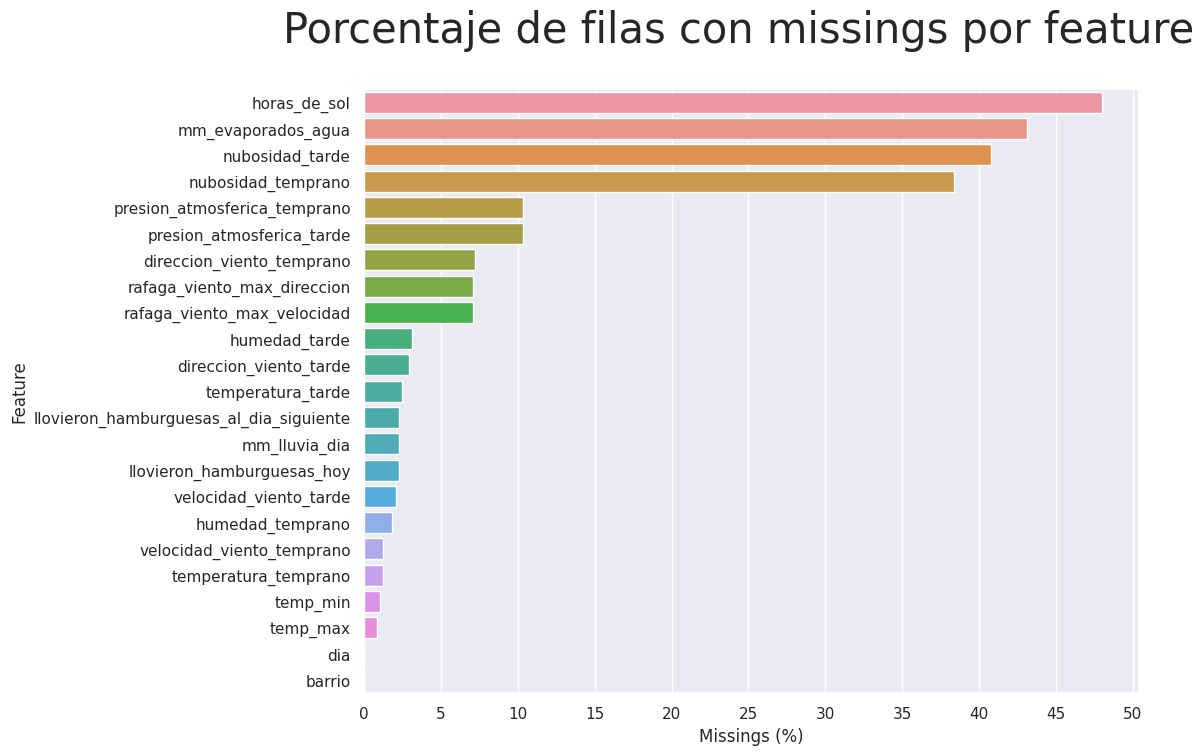

In [26]:
def plot_missings(dataframe):
    fig, ax = plt.subplots(figsize=(10,8), dpi = 100)
    fig.suptitle("Porcentaje de filas con missings por feature", fontsize=30)
    
    sns.barplot(
        data=(dataframe.isna().mean() * 100)
            .sort_values(ascending=False)
            .to_frame("Missings (%)")
            .reset_index()
            .rename(columns={"index": "Feature"}),
        x="Missings (%)",
        y="Feature",
        ax=ax
    )
    ax.set_xticks(range(0, 55,5))
    ax.set_xlabel("Missings (%)")
    ax.set_ylabel("Feature")
    plt.show()
    
plot_missings(df)

El gráfico representa el porcentaje de filas con datos faltantes por columna.
Podemos ver en el gráfico que en las columnas de día y barrio no hay ningún dato faltante. La mayoría de estos se encuentran en las columnas de ***horas_de_sol***, ***mm_evaporados_agua***, ***nubosidad_tarde*** y ***nubosidad_temprano***.
Resulta interesante observar que, para el caso de features asociadas a una misma variable climática, el porcentaje de missings es similar. Por ejemplo, el caso de ***presion_atmosferica_tarde*** y ***presion_atmosferica_temprano***.
Surge la posibilidad de que los missings en dichas variables estén relacionados.

## ¿Cómo se relacionan los datos faltantes?

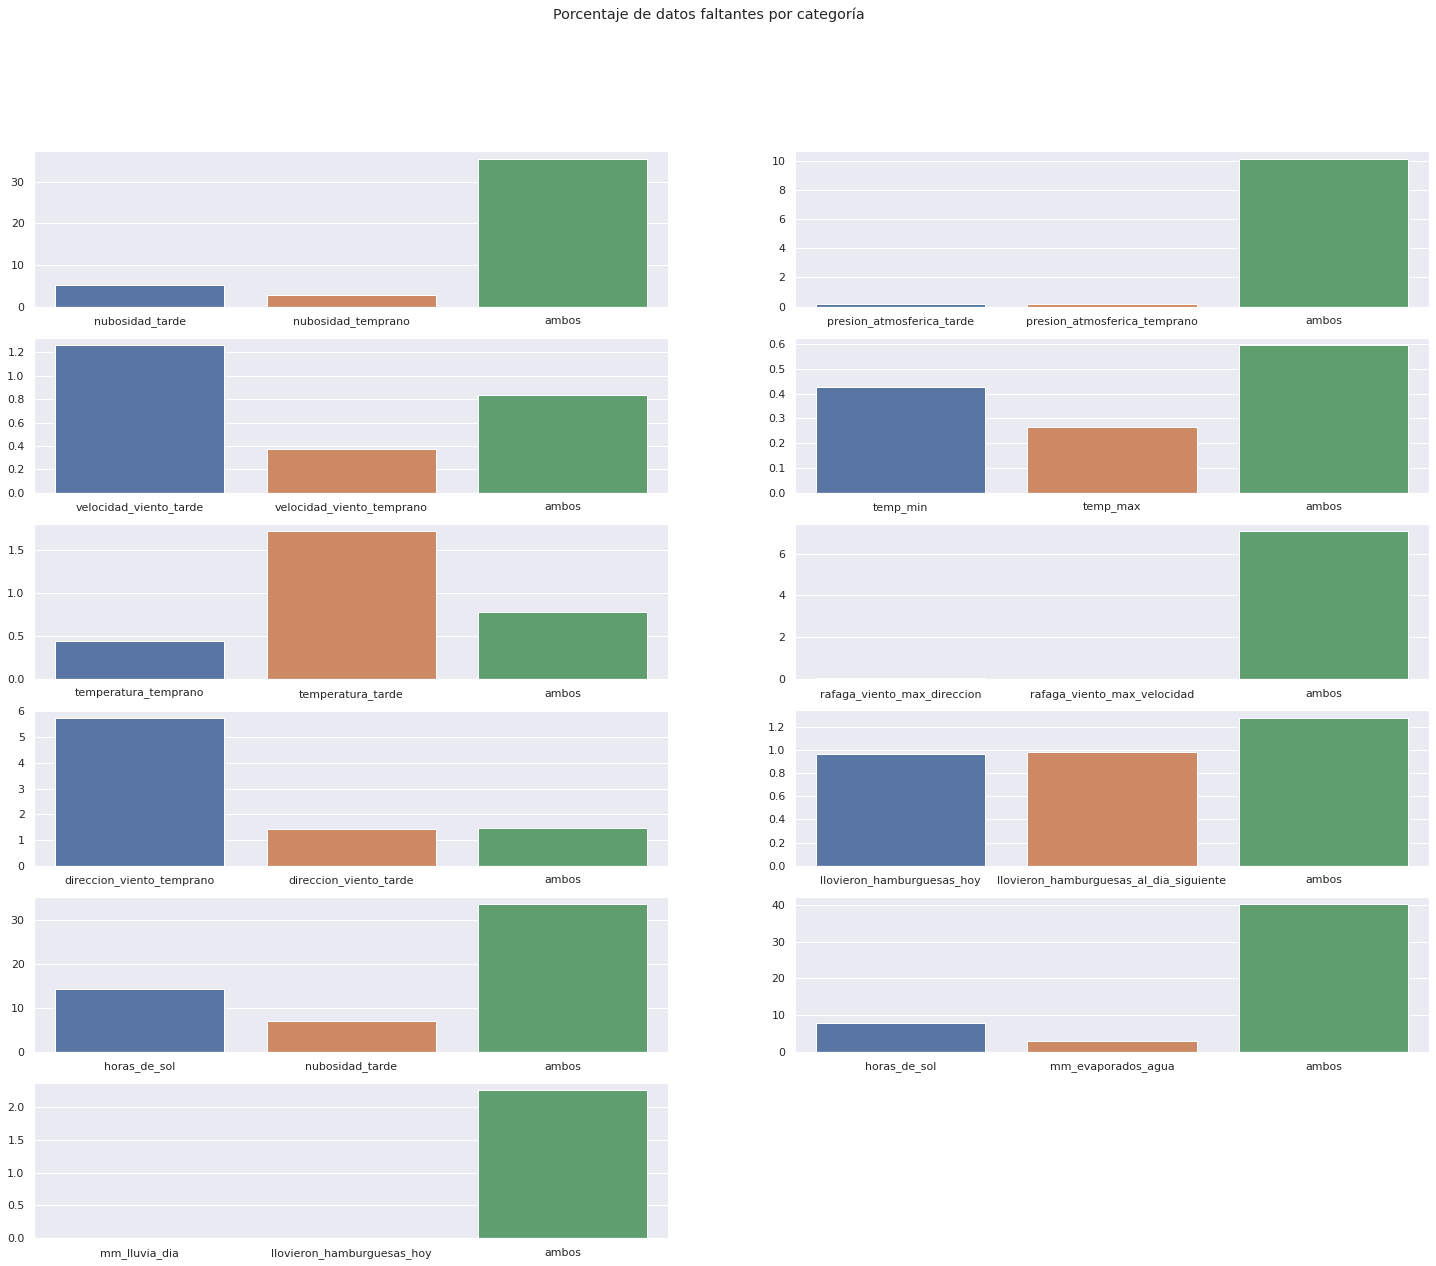

In [27]:
pares_features = [("nubosidad_tarde", "nubosidad_temprano"),
                  ("presion_atmosferica_tarde", "presion_atmosferica_temprano"),
                  ("velocidad_viento_tarde", "velocidad_viento_temprano"),
                  ("temp_min", "temp_max"),
                  ("temperatura_temprano", "temperatura_tarde"),
                  ("rafaga_viento_max_direccion", "rafaga_viento_max_velocidad"),
                  ("direccion_viento_temprano", "direccion_viento_tarde"),
                  ("llovieron_hamburguesas_hoy", "llovieron_hamburguesas_al_dia_siguiente"),
                  ("horas_de_sol", "nubosidad_tarde"),
                  ("horas_de_sol", "mm_evaporados_agua"),
                  ("mm_lluvia_dia", "llovieron_hamburguesas_hoy")
                 ]

def mostrar_relacion_faltantes(ax, feature1, feature2):
    faltan_en_uno = df[feature1].isna().mean() * 100
    faltan_en_otro = df[feature2].isna().mean() * 100
    faltan_en_ambos = (df[feature1].isna() & df[feature2].isna()).mean() * 100
    y = [faltan_en_uno - faltan_en_ambos, faltan_en_otro - faltan_en_ambos, faltan_en_ambos]
    x = [feature1, feature2, "ambos"]
    sns.barplot(
        ax=ax,
        x=x,
        y=y,
    )

fig, axs = plt.subplots((len(pares_features) + 1)//2,2, figsize=(25,20))

for ax,par_feature in zip(axs.flat, pares_features):
    mostrar_relacion_faltantes(ax, par_feature[0], par_feature[1])
    #ax.set_ylabel("Porcentaje de missings (%)")
    #ax.set_xlabel("Features")

for ax in axs.flat[len(pares_features):]:
    ax.axis("off")
    
fig.suptitle("Porcentaje de datos faltantes por categoría")
plt.show()

Para los pares de nubosidad, presión atmosférica y ráfaga de viento, casi en todos los casos en los que falta uno de los datos, también falta el otro. Esto es un caso de Missing At Random. Algo similar, aunque en menor proporción, ocurre con ***horas_de_sol***, ***nubosidad_tarde*** y ***mm_evaporados_agua***. Para el resto de los casos, no hay evidencia clara de que ocurra.
Por otro lado, vemos que hay muchos más missings en ***direccion_viento_temprano*** que en ***direccion_viento_tarde***, y lo mismo para ***temperatura_tarde*** y ***temperatura_temprano***. Esto despierta la sospecha de que, quizá, algunos missings están relacionados con el valor de la variable target. Para poder comprobar esta posibilidad, primero debemos saber como se distribuyen los valores de esta variable.
Otra cosa que habíamos pensado es que si alguna de estas parejas tenía la columna de _ambos_ en un valor muy reducido comparado a las otras 2, y encontrabamos algún tipo de relación entre la pareja, quizás podíamos salvar los missings de una con los datos de la otra. Lamentablemente esto no se dio ya que dicha columna siempre tiene un porcentaje bastante alto.

## ¿Cómo se distribuyen los valores de la variable target?

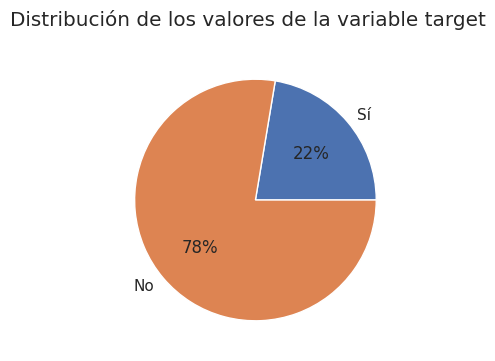

In [28]:
distribucion_target = df.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True)
llovio_al_dia_siguiente = distribucion_target.loc[1]
no_llovio_al_dia_siguiente = distribucion_target.loc[0]

fig, ax = plt.subplots(dpi=100)
fig.suptitle("Distribución de los valores de la variable target")
ax.pie(
    [llovio_al_dia_siguiente, no_llovio_al_dia_siguiente],
    labels=["Sí", "No"],
    autopct='%1.0f%%',
)
plt.show()

Los valores no esán distribuidos de manera uniforme, sino que en la mayoría de los casos no llovió al día siguiente. De gráficos anteriores, también sabemos que el porcentaje de missings es bastante bajo. Esta información será útil al momento de evaluar la accuracy de la baseline: si es menor a 78%, será una mala baseline, ya que una función que devuelva "no" de manera incondicional, la superaría.
Retornamos a la pregunta de la cual surgió este análisis

## ¿Los missings están relacionados con el valor de la variable target?

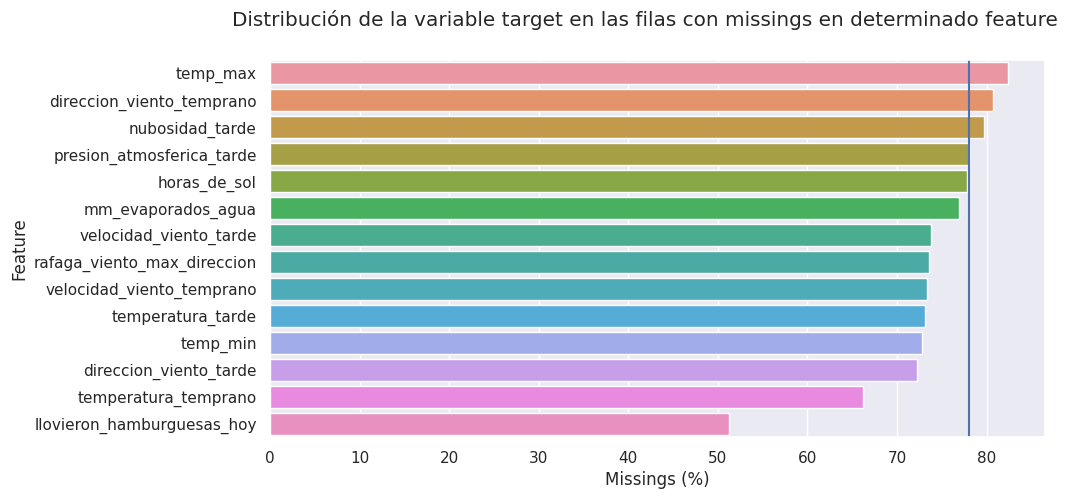

In [29]:
features_missings = [
    "nubosidad_tarde",
    "presion_atmosferica_tarde",
    "velocidad_viento_tarde",
    "velocidad_viento_temprano",
    "temp_min",
    "temp_max",
    "temperatura_temprano",
    "temperatura_tarde",
    "rafaga_viento_max_direccion",
    "direccion_viento_temprano",
    "direccion_viento_tarde",
    "llovieron_hamburguesas_hoy",
    "horas_de_sol",
    "mm_evaporados_agua"
]
features_missings.sort(key=lambda feature: df[df[feature].isna()].llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True).loc[1])
    
def plot_missings_target(dataframe, linea_ver):
    fig, ax = plt.subplots(figsize=(10,5), dpi = 100)
    fig.suptitle("Porcentaje de filas con missings por feature", fontsize=30)
    data = []
    nuev_df = pd.DataFrame();
    for feature in features_missings:
        data.append(dataframe[dataframe[feature].isna()].llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True).loc[0]*100)
    nuev_df["Feature"] = features_missings
    nuev_df["Missings (%)"] = data
    sns.barplot(data=nuev_df, ax=ax, x = "Missings (%)", y = "Feature")
    
    fig.suptitle("Distribución de la variable target en las filas con missings en determinado feature")
    ax.set_ylabel("Features")
    ax.set_xlabel("Casos con missings en los que no llovió al día siguiente (%)")
    ax.set_xlabel("Missings (%)")
    ax.set_ylabel("Feature")
    ax.axvline(linea_ver)
    plt.show()
    
plot_missings_target(df, 78)

La linea vertical en 78% indica el valor "normal" que debería tener la feature, tal y como se analizó anteriormente. Vemos que la mayoría de features no presenta una relación evidente entre los missings y el valor de la variable target. El único valor sobresaliente es el de llovieron_hamburguesas_hoy en el cual, a primera vista, pareciera estar relacionado. Pero, como se vio anteriormente, dicha variable tiene un porcentaje de missings muy bajo, por lo cual es muy probable de que se trate de una coincidencia azarosa.

## ¿Qué rows con datos faltantes podemos dropear sin perder muchos datos?

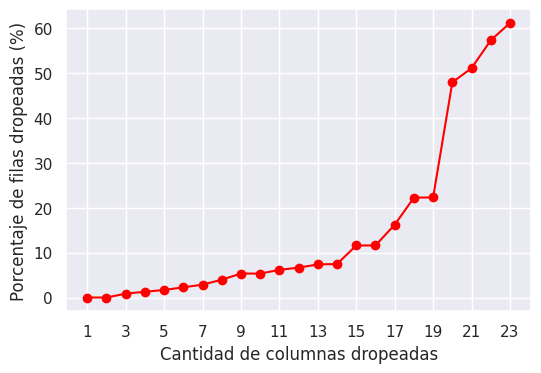

In [30]:
x = range(1, len(df.columns) + 1)
y = []

features_ord = sorted(df.columns, key=lambda f : len(df[df[f].isna()]))
for i in x:
    df_drop = df_original.loc[df_original[features_ord[:i]].dropna().index]
    y.append((1 - len(df_drop)/len(df_original))*100)

plt.figure(dpi=100)
plt.ylabel("Porcentaje de filas dropeadas (%)")
plt.xlabel("Cantidad de columnas dropeadas")
plt.plot(x, y, "o-", color = 'red')
plt.xticks(x[::2])
plt.show()

Este gráfico representa el porcentaje de samples que perdemos del total al dropear las últimas $n$ features con menos datos faltantes del dataset. Como no encontramos ninguna relación por ahora para poder manejar los missings, podríamos dropear los valores de al menos las columnas con menos datos. Decidimos por ahora dejarlas y trabajar con los gráficos de forma tal que simplemente ignoren la fila si la feature que estamos graficando es NaN.

# Análisis de las variables

## ¿Cómo de distribuyen los valores de las variables?

Vamos a ver donde se concentran los valores de cada feature

### Temperaturas

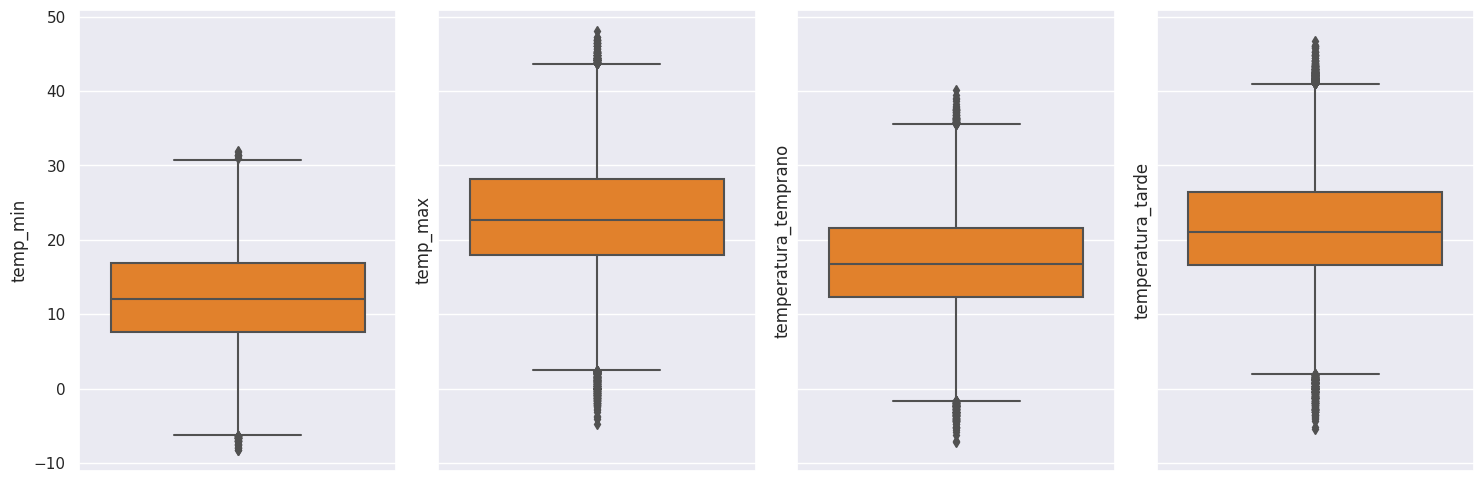

In [31]:
fig, axs = plt.subplots(1, 4, dpi=100, figsize = (15, 5), sharey = True)
sns.boxplot(y = df.temp_min, ax = axs[0], color = get_par_colores("temp_min")[0])
sns.boxplot(y = df.temp_max, ax = axs[1], color = get_par_colores("temp_max")[0])
sns.boxplot(y = df.temperatura_temprano, ax = axs[2], color = get_par_colores("temperatura_temprano")[0])
sns.boxplot(y = df.temperatura_tarde, ax = axs[3], color = get_par_colores("temperatura_tarde")[0])
plt.tight_layout()
plt.show()

Para las temperaturas, estan rondan más que nada entre los 10° y 20°, que es lo esperado (considerandolas en °C). Podemos ver que hay bastantes outliers pero se encuentra bastante bien distribuido, no son valores muy fuera de contexto. Únicamente nos resultó extraño ver temperaturas mayores a 40° ya que no son valores comunes en Buenos Aires.

### Presión

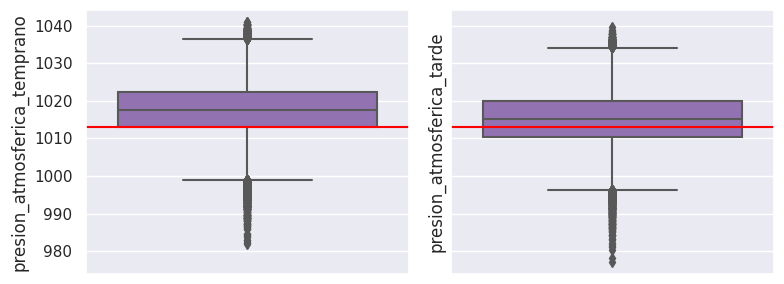

In [32]:
fig, axs = plt.subplots(1, 2, dpi=100, figsize = (8, 3), sharey = True)
sns.boxplot(y = df.presion_atmosferica_temprano, ax = axs[0], color = get_par_colores("presion_atmosferica_temprano")[0])
sns.boxplot(y = df.presion_atmosferica_tarde, ax = axs[1], color = get_par_colores("presion_atmosferica_tarde")[0])
axs[0].axhline(1013, color = 'red')
axs[1].axhline(1013, color = 'red')
plt.tight_layout()
plt.show()

Los valores de las presiones están muchísimo menos dispersos que los de las temperaturas, se encuentran más concentrados alrededor de la presión promedio entre 1010 y 1020 (siendo 1013hPa la presión atmosférica normal). Lo podemos notar viendo el ancho de la caja.

En general parecen ser presiónes más bien altas, más que nada durante la mañana, pero no es tan extraño.
Hay también bastantes outliers, pero no son valores particularmente fuera de lo común.

### Nubosidad

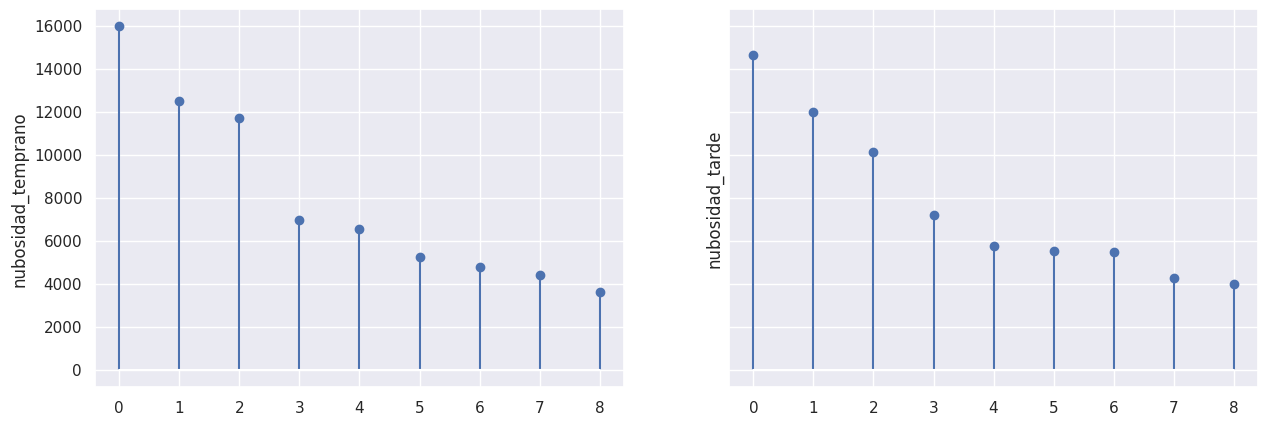

In [33]:
fig, axs = plt.subplots(1,2,dpi=100, figsize=(15,5), sharey = True)

axs[1].stem(df.nubosidad_tarde.value_counts(),  markerfmt = 'C0o', linefmt = 'C0', basefmt = 'white')
axs[0].stem(df.nubosidad_temprano.value_counts(), markerfmt = 'C0o', linefmt = 'C0', basefmt = 'white')

axs[1].set_ylabel("nubosidad_tarde")
axs[0].set_ylabel("nubosidad_temprano")
plt.show()

No hay mucho que comentar sobre estos valores ya que no sabemos como se midió la escala de nubosidad. Nada más mencionar que parece tener sentido que 0 de nubosidad sea el valor más común, da a entender que la mayor parte de los días son soleados.

### Humedad

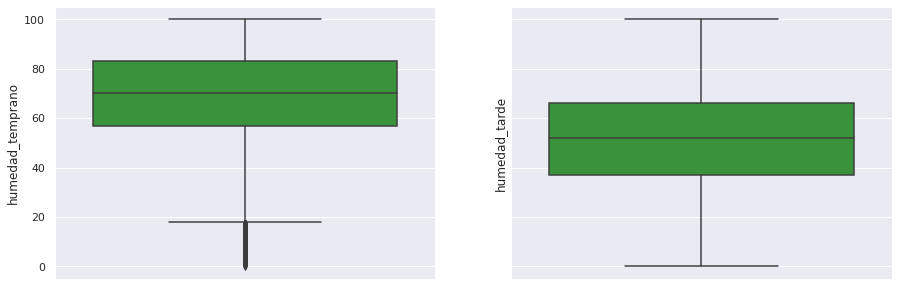

In [34]:
fig, axs = plt.subplots(1,2,figsize=(15,5), sharex=True, sharey=True)

sns.boxplot(y = df.humedad_temprano, ax = axs[0], color = get_par_colores("humedad_temprano")[0])
sns.boxplot(y = df.humedad_tarde, ax = axs[1], color = get_par_colores("humedad_tarde")[0])

plt.show()

En este caso, la humedad de la mañana tiende a ser mayor, como es común. También tiene muchos más outliers que a la tarde pero todos son valores comunes entre 0% y 100%.

### Milímetros de agua

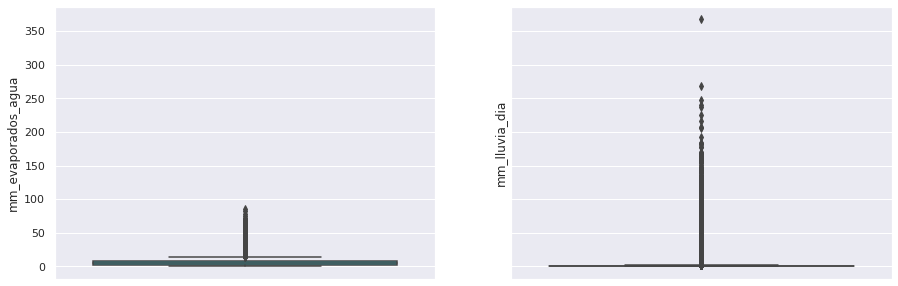

In [35]:
fig, axs = plt.subplots(1,2,figsize=(15,5), sharex=True, sharey=True)

sns.boxplot(y = df.mm_evaporados_agua, ax = axs[0], color = get_par_colores("mm_evaporados_agua")[0])
sns.boxplot(y = df.mm_lluvia_dia, ax = axs[1], color = get_par_colores("mm_lluvia_dia")[0])

plt.show()

En este caso, hay muchísimos outliers y los gráficos carecen de mucho sentido. Para poder observarlos mejor, vamos a estar tomando un percentil más chico:

In [36]:
print(f"Percentil 99.5% de mm_evaporados_agua: {df.mm_evaporados_agua.quantile(0.995) : .2f}")
print(f"Percentil 99.5% de mm_lluvia_dia: {df.mm_lluvia_dia.quantile(0.995) : .2f}")

Percentil 99.5% de mm_evaporados_agua:  22.85
Percentil 99.5% de mm_lluvia_dia:  53.40


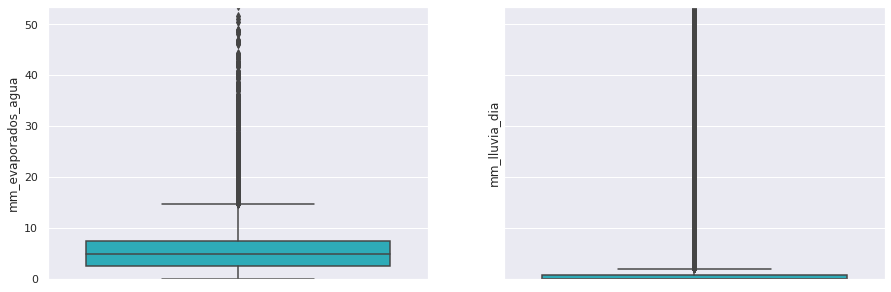

In [37]:
fig, axs = plt.subplots(1,2,figsize=(15,5), sharex=True, sharey=True)

sns.boxplot(y = df.mm_evaporados_agua, ax = axs[0], color = get_par_colores("mm_evaporados_agua")[0])
sns.boxplot(y = df.mm_lluvia_dia, ax = axs[1], color = get_par_colores("mm_lluvia_dia")[0])
axs[0].set_ylim(0, 53.4)
axs[1].set_ylim(0, 53.4)

plt.show()

Ahora si se llega a apreciar un poco mejor, aunque el de ***mm_lluvia_dia*** sigue siendo la caja bastante chica.
Generalmente se evaporan alrededor de 5 mm de agua por día, mientras que los que llueven están mucho más cerca del 0.

Tiene sentido que la media de ***mm_lluvia_dia*** este tan cerca del 0, ya que la mayor parte de los días no llueve, y los que el boxplot da a entender como outliers son los días en los que sí llueve.

### Horas de sol

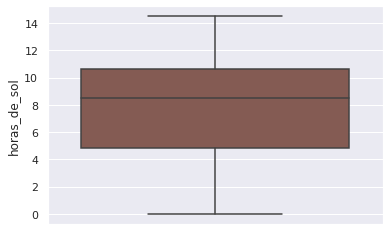

In [38]:
sns.boxplot(y = df.horas_de_sol, color = get_par_colores("horas_de_sol")[0])
plt.show()

En este caso no hay mucho que destacar, siempre hay entre 0 y 14 horas de sol por día y los valores más reducidos son aquellos días en los que está nublado. No aparenta haber outliers.

### Viento

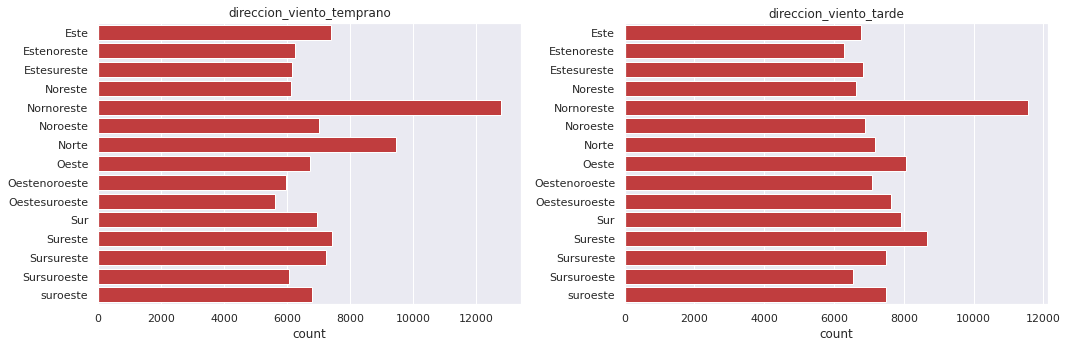

In [39]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

sns.countplot(y = "direccion_viento_temprano", data = df, ax = axs[0], color = get_par_colores("direccion_viento_temprano")[0])
sns.countplot(y = "direccion_viento_tarde", data=df, ax = axs[1], color = get_par_colores("direccion_viento_tarde")[0])
axs[0].set_ylabel("")
axs[0].set_title("direccion_viento_temprano")
axs[1].set_ylabel("")
axs[1].set_title("direccion_viento_tarde")
plt.tight_layout()
plt.show()

Para las direcciones de viento, podemos ver que por alguna razón falta la de Nornoroeste y parece haber muchos más días en los que la dirección era Nornoreste. Una posibilidad es que por alguna razón se hayan juntado esas 2 columnas, pero no podemos saber ni hacer mucho al respecto.

Para la ráfaga del viento:

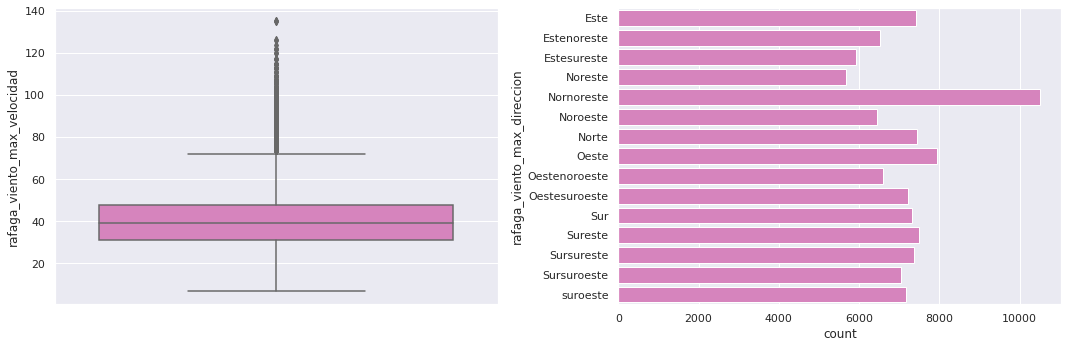

In [40]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = df.rafaga_viento_max_velocidad, color = get_par_colores("rafaga_viento_max_velocidad")[0], ax = axs[0])
sns.countplot(y = "rafaga_viento_max_direccion", data=df, ax = axs[1], color = get_par_colores("rafaga_viento_max_direccion")[0])
plt.tight_layout()
plt.show()

La distribución de la variable ***rafaga_viento_max_direccion*** es muy similar a la de los gráficos anteriores, no aporta mucha mas información.

En cuando a la velocidad máxima, tiene bastante sentido en relación a los dos gráficos que mostraremos a continuación, ya que tiende a ser un poco más alta que esas 2.

Para las velocidades de la mañana y tarde:

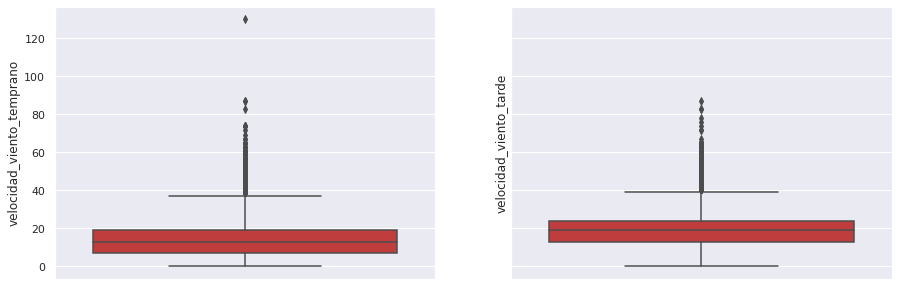

In [41]:
fig, axs = plt.subplots(1,2,figsize=(15,5), sharex=True, sharey=True)

sns.boxplot(y = df.velocidad_viento_temprano, ax = axs[0], color = get_par_colores("velocidad_viento_temprano")[0])
sns.boxplot(y = df.velocidad_viento_tarde, ax = axs[1], color = get_par_colores("velocidad_viento_tarde")[0])

plt.show()

En este caso, también hay bastante concentración de valores sobre la media pero hay outliers mucho más extremos.
En general, son valores bastante comúnes en km/h y parece ser que a la tarde hay velocidades más altas.

### Día

In [42]:
print(f"Mínimo día: {df.dia.min()}")
print(f"Máximo día: {df.dia.max()}")

Mínimo día: 2007-11-01 00:00:00
Máximo día: 2017-06-25 00:00:00


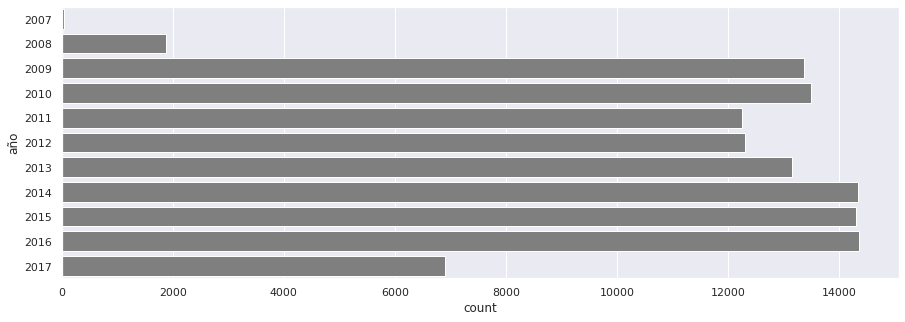

In [43]:
bins = []
anios = []
for i in range(2007, 2019):
    bins.append(np.datetime64(date(i,1,1)))
    anios.append(i)

df_copia = df.copy()
df_copia["anio"] = pd.cut(df.dia, bins, labels = anios[:-1])

plt.figure(figsize = (15,5))
sns.countplot(y = df_copia.anio, color = get_par_colores("dia")[0])
plt.ylabel("año")
plt.show()

Parece que la distribución es más o menos uniforme entre los años 2009 a 2016, disminuyendo un poco en 2011 a 2013.
Los años que tienen notablemente menos medidas son el primero y último, 2008 y 2017, que es de esperar ya que seguro se empezó y terminó de medir a mediados del año.

Algo a notar es que hay mucho más de 365 filas por año, por lo que se ve que Flint se pasaba todo el día haciendo mediciones.

### Barrio

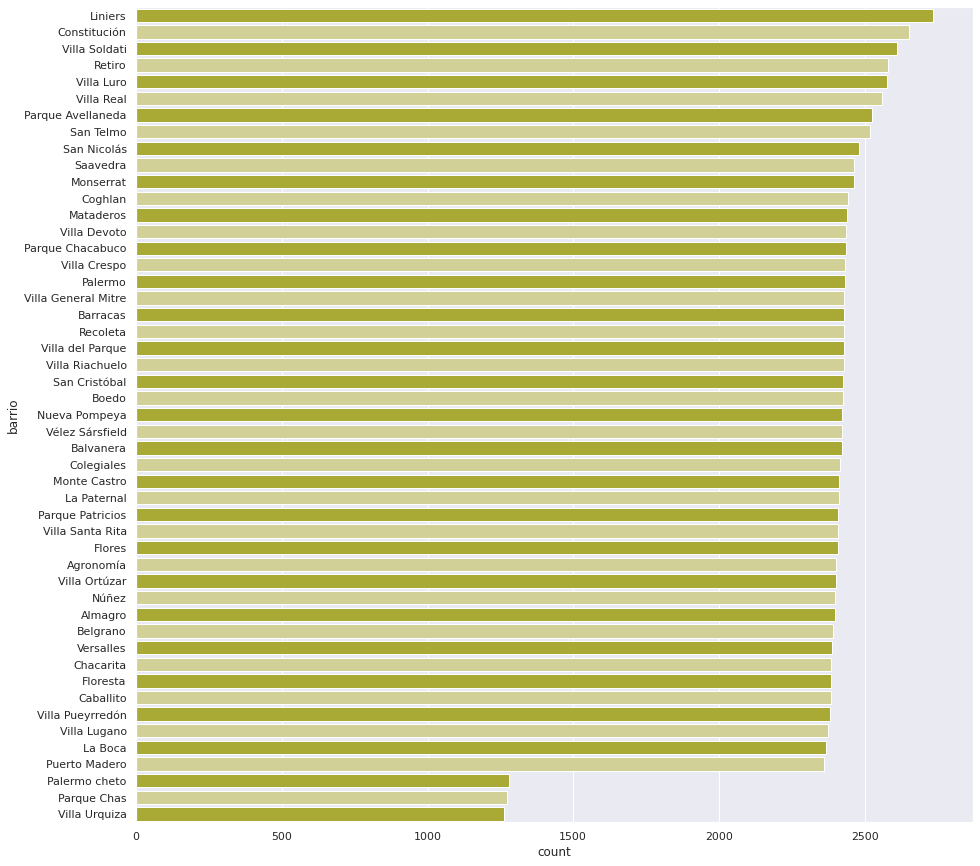

In [44]:
plt.figure(figsize=(15,15))
orden = df.barrio.value_counts()
sns.countplot(y = "barrio", data=df, palette = get_par_colores("barrio"), order = orden.index)
plt.show()

En el caso de los barrios, la distribución parece bastante uniforme, excepto por los barrios de *Palermo cheto*, *Parque Chas* y *Villa Urquiza* que por alguna razón tienen bastante menos datos.

# Relación entre variables

## ¿Qué pares de variables tienen mayor covarianza? ¿Es posible combinar features?

La covarianza es un valor que indica el grado de variación conjunta de dos variables respecto a sus media, y nos permite determinar si existe una dependencia entre ambas variables.

In [49]:
pares_ord_cov = df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
pares_ord_cov = pares_ord_cov[pares_ord_cov < 1]
display(pares_ord_cov.to_frame("|Covarianza|").head(8))

|Covarianza|
temperatura_tarde         temp_max                          0.984493
presion_atmosferica_tarde presion_atmosferica_temprano      0.961457
temperatura_temprano      temp_min                          0.901971
                          temp_max                          0.887330
                          temperatura_tarde                 0.860744
temp_min                  temp_max                          0.737075
                          temperatura_tarde                 0.709390
nubosidad_tarde           horas_de_sol                      0.703245

Las variables de temperatura parecen estar bastante relacionadas entre sí, en especial temperatura_tarde y temp_max. También presion_atmosferica_tarde y presion_atmosferica_temprano. Para observar estas relaciones, podemos graficar los respectivos scatterplots.

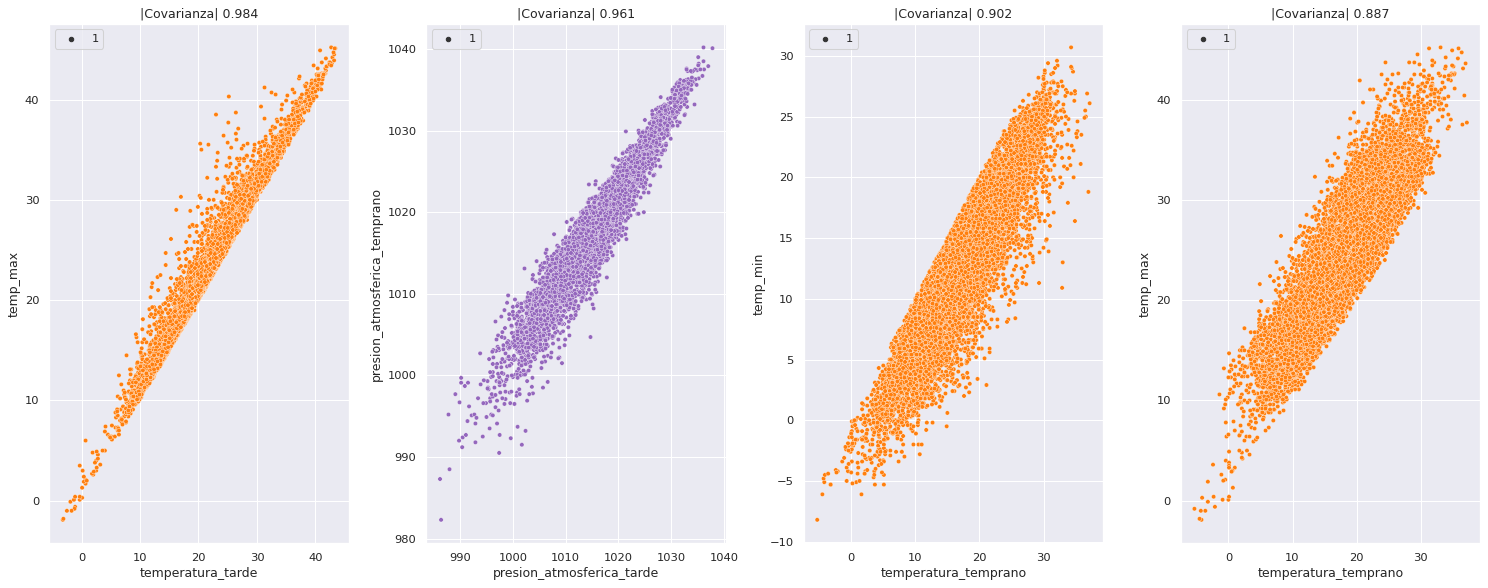

In [50]:
fig, axs = plt.subplots(1, 4, figsize=(20,8))
fig.set_dpi(75)
for cov, ax in zip(pares_ord_cov.index[:4], axs.flat):
    ax.set_title(f"|Covarianza| {pares_ord_cov[cov]:.3f}")
    g= sns.scatterplot(
        x=cov[0],
        y=cov[1],
        palette="tab10",
        data=df.sample(10000, random_state=0),
        ax=ax,
        size=1,
        color = paleta["temperatura"]["par_colores"][0] if ax != axs[1] else paleta["presion_atmosferica"]["par_colores"][0]
    )

plt.tight_layout()
plt.show()

Estas features parecen estar bastante relacionadas, pero no nos parece que lo suficiente como para descartar ninguna.

En el caso de las temperaturas, era de esperar que tengan una cierta correlación ya que justamente la temperatura máxima y mínima acotan el rango de valores que pueden tener las temperaturas de la tarde y temprano, es por eso que se ve tan marcada la recta de $y = x$ en esos gráficos.

Para la presión, también está bastante cerca del centro, lo cual indica que la presión no varía mucho de la mañana a la tarde.

Podemos también graficar las temperaturas por día:

[]

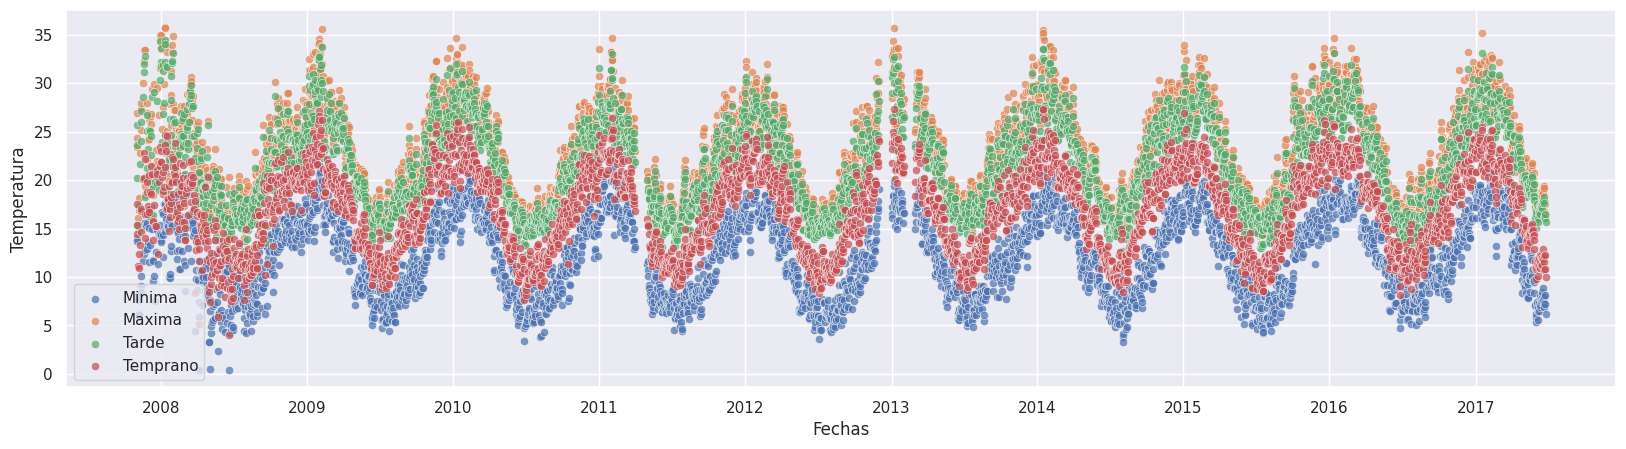

In [51]:
grupo = df.groupby("dia").agg("mean").reset_index()
fig, ax = plt.subplots(dpi=100, figsize=(20,5))

ax.set_ylabel("Temperatura")
ax.set_xlabel("Fechas")
sns.scatterplot(x="dia", y="temp_min", data=grupo, label="Minima", alpha=0.7)
sns.scatterplot(x="dia", y="temp_max", data=grupo, label="Maxima", alpha=0.7)
sns.scatterplot(x="dia", y="temperatura_tarde", data=grupo, label="Tarde", alpha=0.7)
sns.scatterplot(x="dia", y="temperatura_temprano", data=grupo, label="Temprano", alpha=0.7)
plt.plot()

Podemos ver claramente la variación de la temperatura con las estaciones del año, aunque no es tan útil para encontrar relaciones con la variable target.

Se puede ver que por lo general tiende a cumplirse que ***temp_min*** < ***temperatura_temprano*** < ***temperatura_tarde*** < ***temp_max***

## ¿Cómo está relacionada la variable mm_lluvia_dia con llovieron_hamburguesas_hoy?

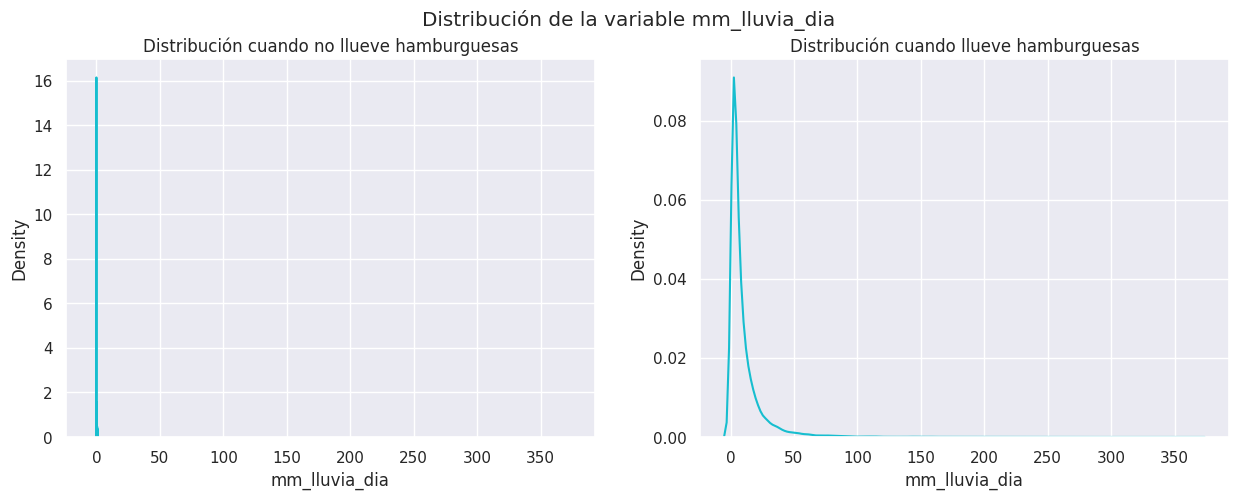

In [45]:
fig, axs = plt.subplots(1,2,dpi=100, figsize=(15,5), sharex = True)

sns.kdeplot(df[df.llovieron_hamburguesas_hoy == 0].mm_lluvia_dia, ax = axs[0], color = get_par_colores("mm_lluvia_dia")[0])
axs[0].set_title("Distribución cuando no llueve hamburguesas")
sns.kdeplot(df[df.llovieron_hamburguesas_hoy == 1].mm_lluvia_dia, ax = axs[1], color = get_par_colores("mm_lluvia_dia")[0])
axs[1].set_title("Distribución cuando llueve hamburguesas")
fig.suptitle("Distribución de la variable mm_lluvia_dia")
plt.show()

Podemos ver que cuando no llueve, tiende a estar muchísimo más cerca del 0 que en cualquier otro caso. Podemos contar los valores posibles para valores menores y mayores que 1:

In [46]:
df[df.mm_lluvia_dia <= 1].llovieron_hamburguesas_hoy.value_counts()

0.0    88356
Name: llovieron_hamburguesas_hoy, dtype: int64

In [47]:
df[df.mm_lluvia_dia > 1].llovieron_hamburguesas_hoy.value_counts()

1.0    25392
Name: llovieron_hamburguesas_hoy, dtype: int64

La columna llovieron_hamburguesas_hoy es completamente dependiente de mm_lluvia_dia, entonces podemos dropearla sin pérdida de información

In [48]:
df.drop(columns=["llovieron_hamburguesas_hoy"], inplace=True)

# Relación con la variable target

Los resultados de esta sección que hayamos usado en la baseline están en negrita.

## ¿Cómo afecta la dirección del viento a la lluvia?

Para ver esto, decidimos representar cada dirección del viento como un ángulo. Ignoramos aquellas que no tienen la dirección especificada.
Graficamos la distribución de samples en cada dirección en general y con la variable target.

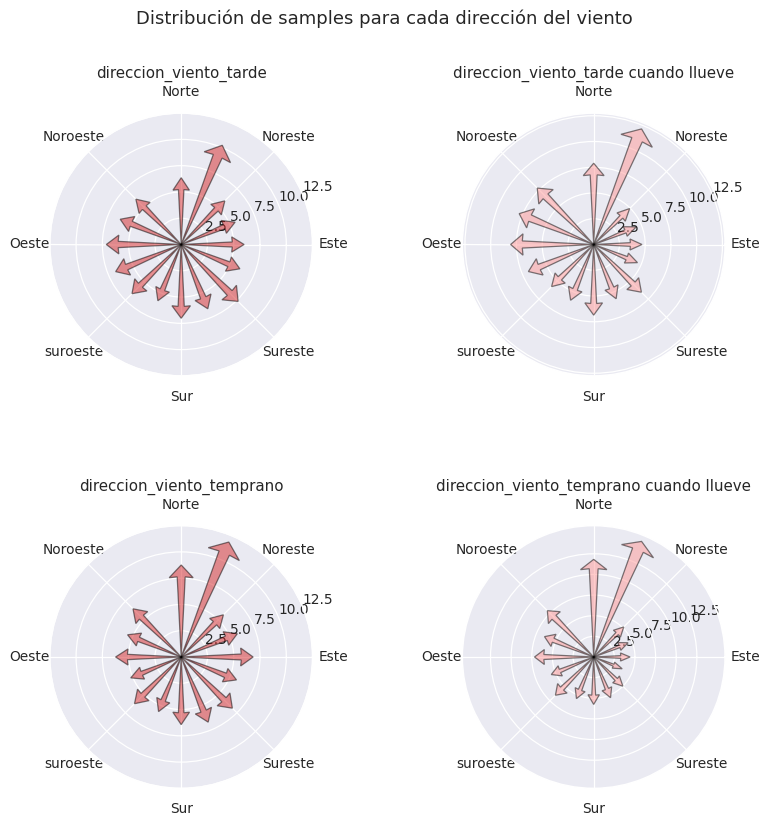

In [52]:
direcciones = {
        'Norte' : 4*np.pi/8,
        'Nornoreste' : 3*np.pi/8,
        'Noreste' : 2*np.pi/8,
        'Estenoreste' : np.pi/8,
        'Este' : 0,
        'Estesureste' : 15*np.pi/8,
        'Sureste' : 14*np.pi/8,
        'Sursureste' : 13*np.pi/8,
        'Sur' : 12*np.pi/8,
        'Sursuroeste' : 11*np.pi/8,
        'suroeste' : 10*np.pi/8,
        'Oestesuroeste' : 9*np.pi/8,
        'Oeste' : 8*np.pi/8,
        'Oestenoroeste' : 7*np.pi/8,
        'Noroeste' : 6*np.pi/8,
        'Nornoroeste' : 5*np.pi/8,
}

def graficar_viento(feature, ax, filtrar_target = False):
    if filtrar_target:
        cont = df[df[variable_target] == 1][feature].value_counts(normalize = True)
        ax.set_title(feature + " cuando llueve")
    else:
        cont = df[feature].value_counts(normalize = True)
        ax.set_title(feature)
        
    for direccion in direcciones:
        if direccion in cont:
            arr = ax.arrow(direcciones[direccion], 0, 0, cont[direccion] * 40, alpha = 0.5, width = 0.1, 
            edgecolor = 'black', length_includes_head = True, facecolor = get_par_colores(feature)[1 if filtrar_target else 0])
    ax.set_yticks(range(1, 6))
    ax.set_yticklabels([2.5*i for i in range(1, 6)]) # Para ajustar la escala de nuevo a la correcta y ponerlo en %
    ax.set_xticks([i*np.pi/4 for i in range(8)])
    ax.set_xticklabels(sorted(direcciones.keys(), key = lambda x: direcciones[x])[::2])

fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True), dpi = 90, figsize = (10, 10))
graficar_viento("direccion_viento_tarde", ax = axs[0][0])
graficar_viento("direccion_viento_temprano", ax = axs[1][0])
graficar_viento("direccion_viento_tarde", ax = axs[0][1], filtrar_target = True)
graficar_viento("direccion_viento_temprano", ax = axs[1][1], filtrar_target = True)
plt.tight_layout(pad = 5)
plt.suptitle("Distribución de samples para cada dirección del viento")
plt.show()

Podemos notar que no parece haber una gran diferencia cuando llueve hamburguesas que cuando no. Pareciera que en ambos casos disminuyeron levemente los vientos en dirección entre Sur y Este y aumentaron las más cercanas al Norte, pero no parece ser un cambio muy significativo como para considerarlo relevante.

## ¿Cómo varían las distintas features numéricas cuando llueven hamburguesas al día siguiente?

Vamos a gráficar un box plot por variable numérica comparando su distribución todos los días vs. los días anteriores a cuando llueve hamburguesas

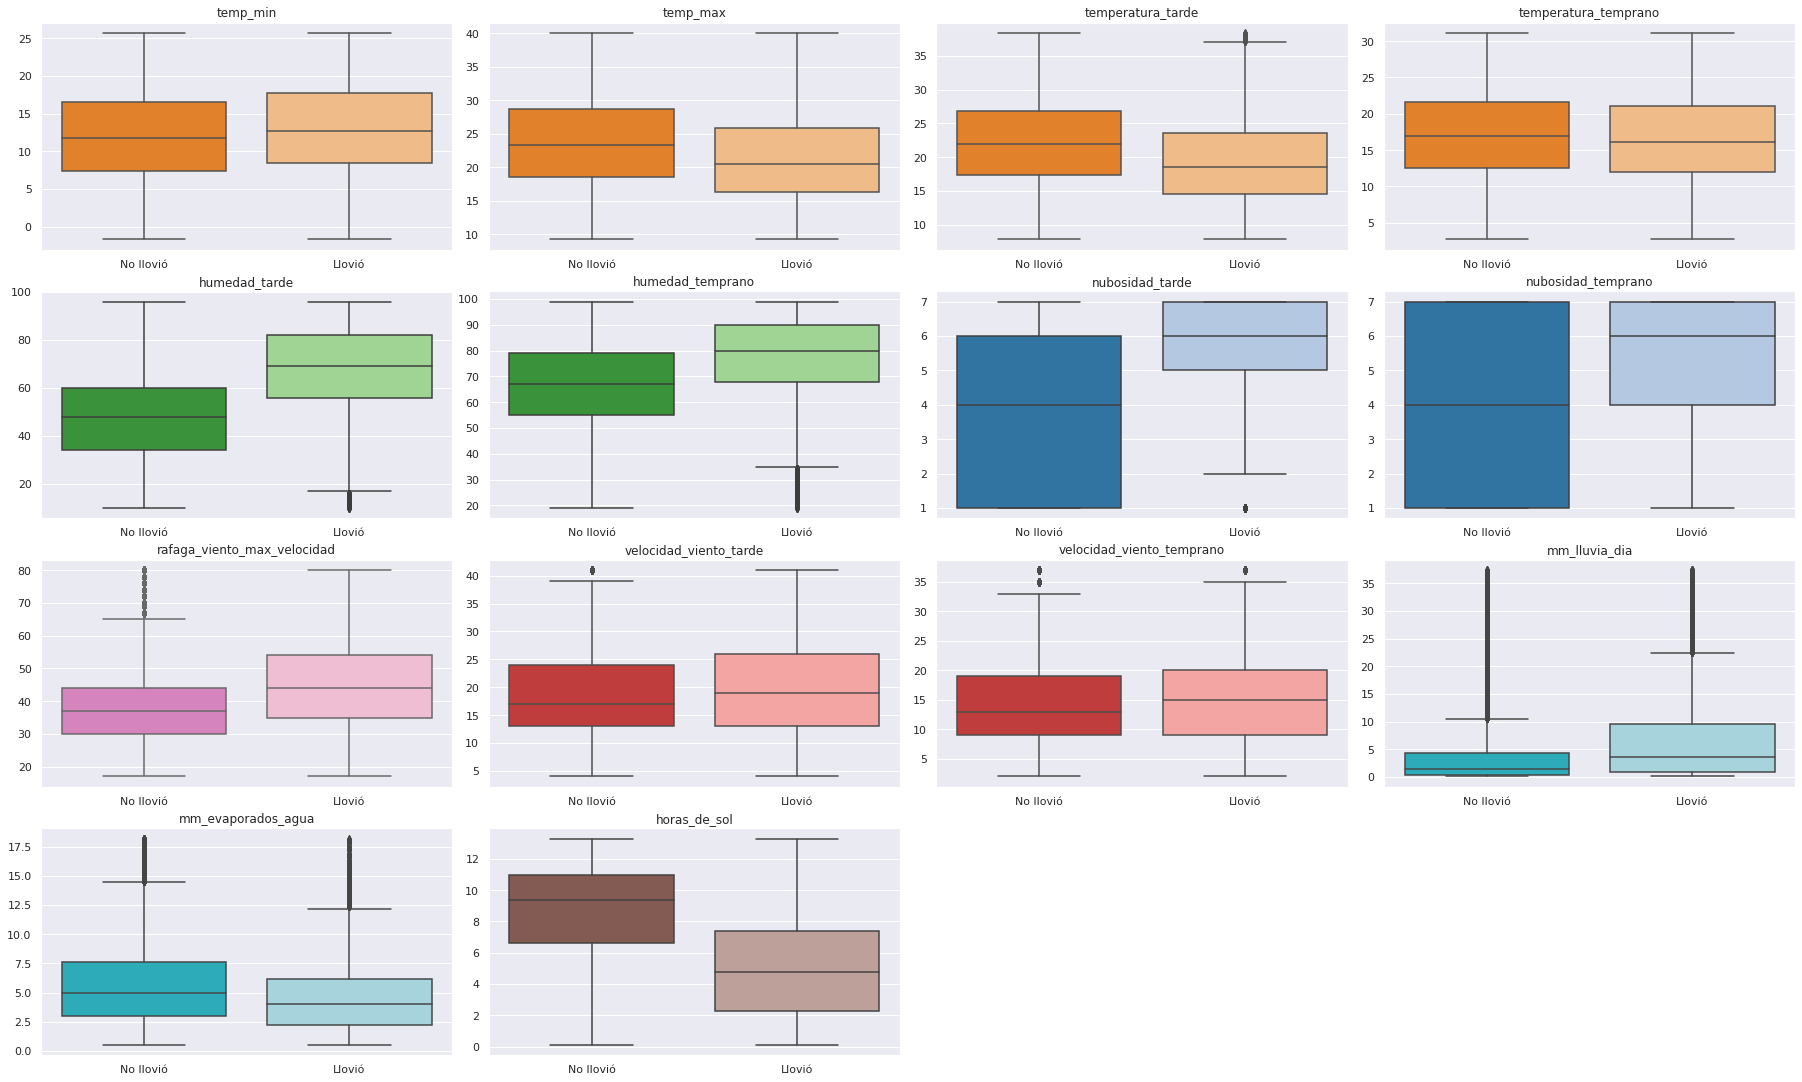

In [53]:
features_num = [
    "temp_min",
    "temp_max",
    "temperatura_tarde",
    "temperatura_temprano",
    "humedad_tarde",
    "humedad_temprano",
    "nubosidad_tarde",
    "nubosidad_temprano",
    "rafaga_viento_max_velocidad",
    "velocidad_viento_tarde",
    "velocidad_viento_temprano",
    "mm_lluvia_dia",
    "mm_evaporados_agua",
    "horas_de_sol"
]
fig, axs = plt.subplots((len(features_num) + 3)//4, 4, figsize=(25,15))
#fig.set_dpi(50)

df_copia = df.copy()
df_copia["all"] = ""
for ax, feature in zip(axs.flat, features_num):
    ax.set_title(feature)
    # Truncamos el dataset para sacar outliers y obtener gráficos más claros
    df_trunc = df_copia[(df_copia[feature] < df_copia[feature].quantile(0.99)) & (df_copia[feature] > df_copia[feature].quantile(0.01))]
    sns.boxplot(
        ax=ax,
        #x="all",
        x="llovieron_hamburguesas_al_dia_siguiente",
        y=feature,
        data=df_trunc,
        palette=get_par_colores(feature),
        #split=True\
    )
    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_xlabel("¿Llovieron hamburguesas al día siguiente?")
    ax.set_xticklabels(["No llovió", "Llovió"])
    #ax.legend().remove()

for ax in axs.flat[len(features_num):]:
    ax.axis("off")

fig.tight_layout(pad=0.5)
plt.show()

Se observa que las variables de horas_de_sol, así como las de humedad y nubosidad, son las más relacionadas con la variable target a primera vista.
Parece que, en el 75% de los días en que llovió al día siguiente, horas_de_sol fue menor a 8, y en el 75% de los días en que no llovió, horas_de_sol fue mayor a 6. Hay que tener en cuenta, sin embargo, que horas_de_sol se trata de la variable con más missings del dataset. En este caso, la relación parece lo suficientemente marcada como para considerar la variable a pesar de ello.
Para humedad_tarde y humedad_temprano, ambos valores son significativamente más altos en los casos en que llovió. Dichas variables tenían pocos missings, por lo que podría ser un buen criterio de predicción.
Lo mismo sucede con la nubosidad, cuya media es más alta los días previos a la lluvia.

Podemos entonces hacer un gráfico de densidad diferenciando entre cuando llueve y cuando no para esas features:

In [54]:
def graf_dens_continua(feature, ax, df_c):
    df_llovio = df[df[variable_target] == 1]
    df_no_llovio = df[df[variable_target] == 0]
    sns.kdeplot(
        x=feature,
        data=df_c[df_c[feature] < df_c[feature].quantile(0.9)],
        ax = ax,
        palette = get_par_colores(feature),
        hue_order=["Sí", "No"],
        hue = variable_target,
        common_norm=False,
    ).legend(["No", "Si"]).set_title("Llovio?")
    ax.set_xlim(left = df_c[feature].min())
    ax.set_xlim(right = df_c[feature].max())
    
def graf_dens_discreta(feature, ax, df_c):
    sns.histplot(
        data=df_c,
        x=feature,
        hue=variable_target,
        palette=get_par_colores(feature),
        ax=ax,
        hue_order=["Sí", "No"],
        bins=bins,
        discrete=True,
        multiple="dodge",
        kde_kws={"legend_out": True},
        shrink = 0.8,
        common_norm=False,
        stat = 'density',
    ).legend(["No", "Si"]).set_title("Llovio?")
    
def graf_cant(feature, ax, df_c, discreta=False, bins="auto", separar = False):
    sns.histplot(
        data=df_c,
        x=feature,
        hue=variable_target,
        palette=get_par_colores(feature),
        ax=ax,
        hue_order=["Sí", "No"],
        bins=bins,
        discrete=discreta,
        multiple="dodge" if discreta or separar else "layer",
        kde_kws={"legend_out": True},
        shrink = 0.8 if discreta or separar else 1
    ).legend(["No", "Si"]).set_title("Llovio?")
    ax.set_xlim(left = df_c[feature].min() - (0.5 if discreta or separar else 0))
    ax.set_xlim(right = df_c[feature].max() + (0.5 if discreta or separar else 0))

def graficar_diferencia_target(feature, discreta = False, bins="auto"):
    df_c = df.replace({variable_target: {1: "Sí", 0: "No"}})
    fig, axs = plt.subplots(1, 2, figsize=(20,5), sharex = True)

    if discreta:
        graf_dens_discreta(feature, axs[0], df_c)
    else:
        graf_dens_continua(feature, axs[0], df_c)

    graf_cant(feature, axs[1], df_c, discreta, bins)

    axs[0].set_title(f"Densidad de {feature}\nsegún variable target")
    axs[1].set_title(f"Cantidad de {feature}\nsegún variable target")

    plt.plot()

Aclaración: Los gráficos de la izquierda de la siguiente sección representan la densidad de cada feature según la variable target por separado. Es decir, son densidades distintas independientes una de otra.

### Horas de sol

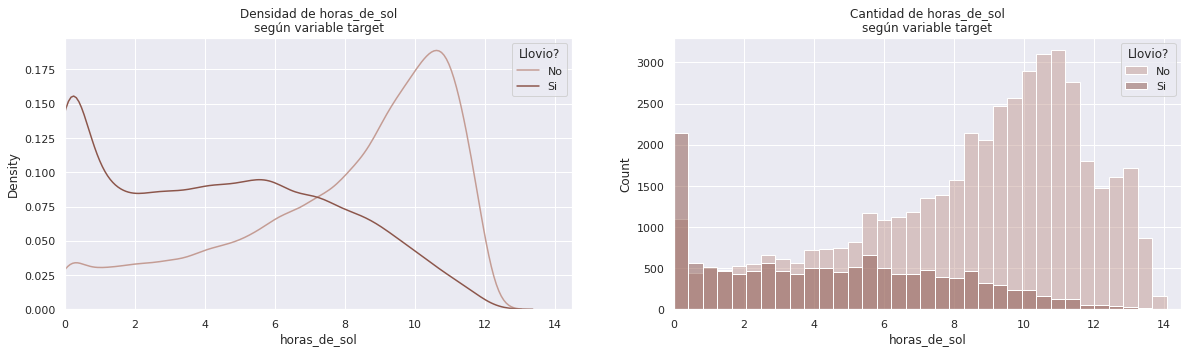

In [55]:
graficar_diferencia_target("horas_de_sol", bins=35)

Como hay tantos samples donde no llueve al día siguiente, la cantidad total de samples en las que llueve y no llueve con pocas horas de sol es similar, pero en general aquellos días en los que va a llover al día siguiente tienden a tener pocas horas de sol.
La mayor diferencia se nota con **horas de sol entre 0 y 1**, donde ya la densidad de casos positivos tiene un pico e incluso hay más samples positivos con esa condición en el dataset que negativos.

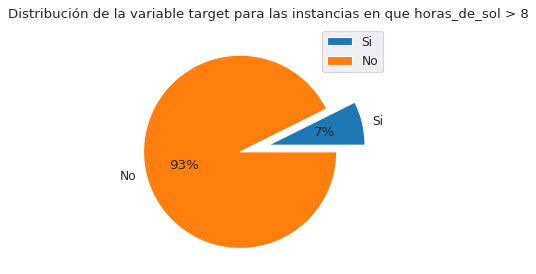

In [56]:
df_c = df.replace({variable_target: {1: "Si", 0: "No"}})
df_si = (df_c[df_c.horas_de_sol > 8] == 'Si').mean()[variable_target]
df_no = (df_c[df_c.horas_de_sol > 8] == 'No').mean()[variable_target]

plt.figure(dpi=80)
plt.pie([df_si, df_no],
       labels=["Si", "No"],
       explode=(0, 0.3),
       colors=sns.color_palette("tab10", 2),
       autopct='%1.0f%%',
       normalize=True)

plt.legend()
plt.title("Distribución de la variable target para las instancias en que horas_de_sol > 8")
plt.show()

df_mucho_sol = df_c[df_c.horas_de_sol > 8]

Podemos ver también que **si las horas de sol son mayores a 8, solo en el 7% de los casos llueve al día siguiente**.

In [57]:
print(f"Porcentaje de instancias que son clasificadas por este criterio: {len(df_mucho_sol) / len(df) * 100 : .1f}%")

Porcentaje de instancias que son clasificadas por este criterio:  27.8%


Este criterio resulta ser útil para clasificar un buen porcentaje de las muestras.

### Humedad

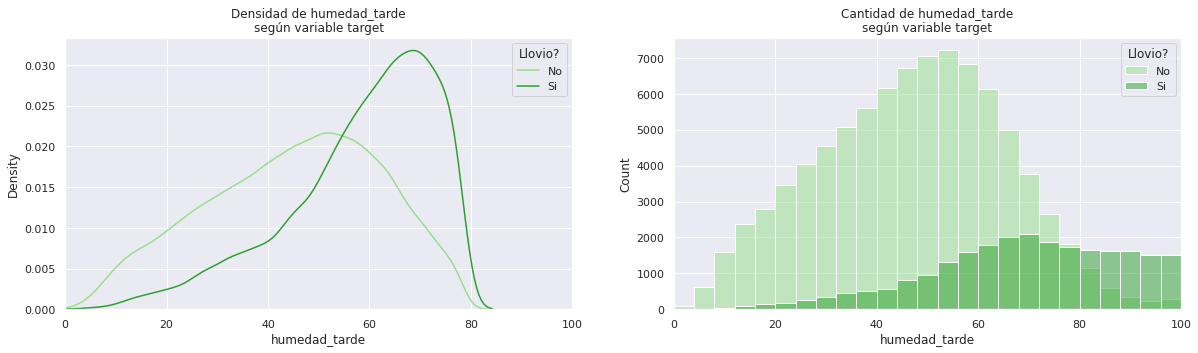

In [58]:
graficar_diferencia_target("humedad_tarde", bins=25)

Nuevamente podemos notar una relación bastante clara, donde aquellos samples donde no hay lluvia al día siguiente tienden a concentrarse cerca de los 50 de humedad mientras que donde si llueve alrededor de los 70 o más.
**A partir de humedad alrededor de 80, ya empiezan a ser más los casos con lluvia al día siguiente que los que no.**

También podemos considerar que **con humedades menores a 60 la cantidad de días que llueve es mucho menor a los que no**:

In [59]:
df_filt = df[(df.humedad_tarde < 60)]
print(f"Porcentaje de días que no llueve con humedad menor a 60:\
{df_filt.llovieron_hamburguesas_al_dia_siguiente.value_counts(normalize=True).get(0)*100 : .2f}%")

Porcentaje de días que no llueve con humedad menor a 60: 89.85%


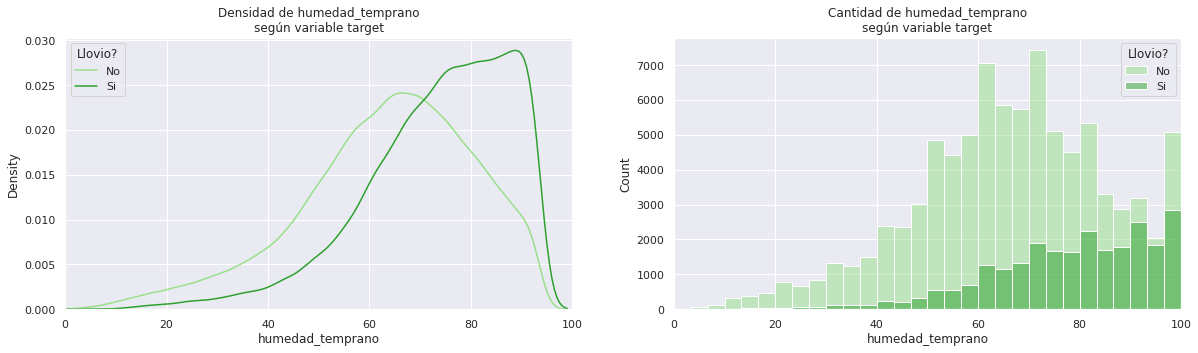

In [60]:
graficar_diferencia_target("humedad_temprano", bins = 30)

En este caso, nuevamente tiende la humedad cuando llueve a ser mayor a la de los días que no llueve. De todas maneras, si vemos la cantidad de samples en ambos casos, parecería que siempre es mayor la cantidad de días que no llueve que las que sí para cualquier humedad, por lo que a priori no podemos utilizar esta feature para filtrar de manera sencilla.

### Nubosidad

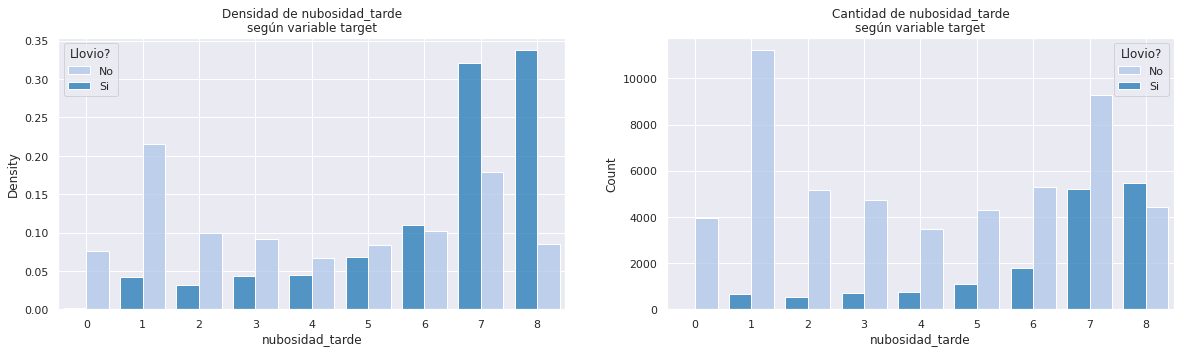

In [61]:
graficar_diferencia_target("nubosidad_tarde", discreta = True)

Otra vez podemos encontrar una relación con la variable target muy rapidamente. Los días que no llueve tienden a tener una nubosidad más baja que los días en los que llueve.
Podemos notar que **para los días con nubosidad de 8, hay más samples en los que llueve al día siguiente que en los que no** (aunque la diferencia no es tan significativa), y aparentemente **no hay ningún día en el que llueva al día siguiente con nubosidad 0**.

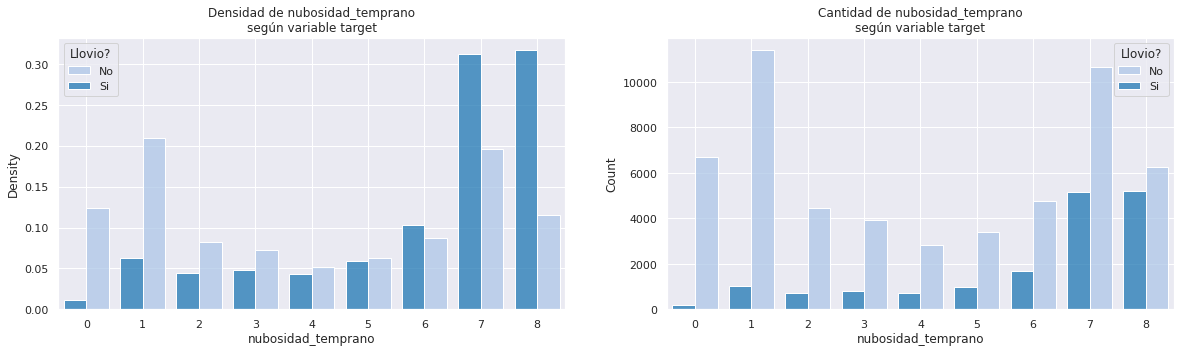

In [62]:
graficar_diferencia_target("nubosidad_temprano", discreta = True)

Para la nubosidad de la mañana, también se nota un incremento en nubosidad con valores altos en la distribución de los días cuando llueve, pero aún así para toda nubosidad hay más samples en los que no llueve, por lo que no nos va a servir para detectar casos de lluvia de manera sencilla.

### Presión atmosférica

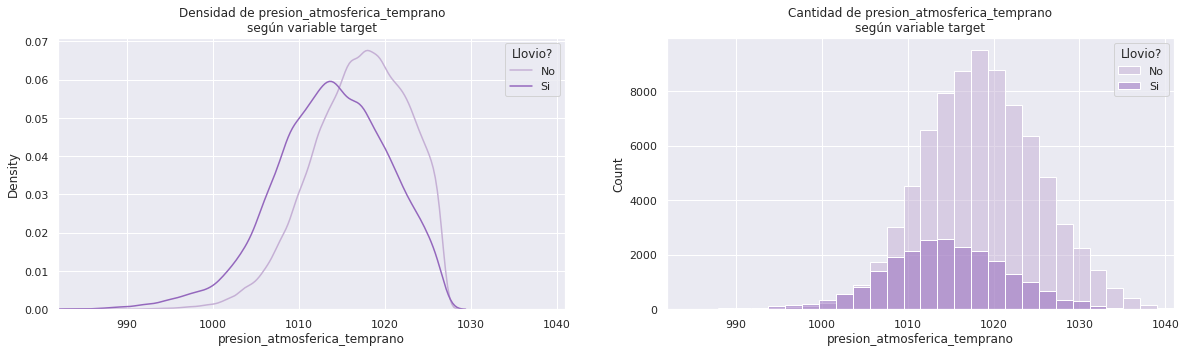

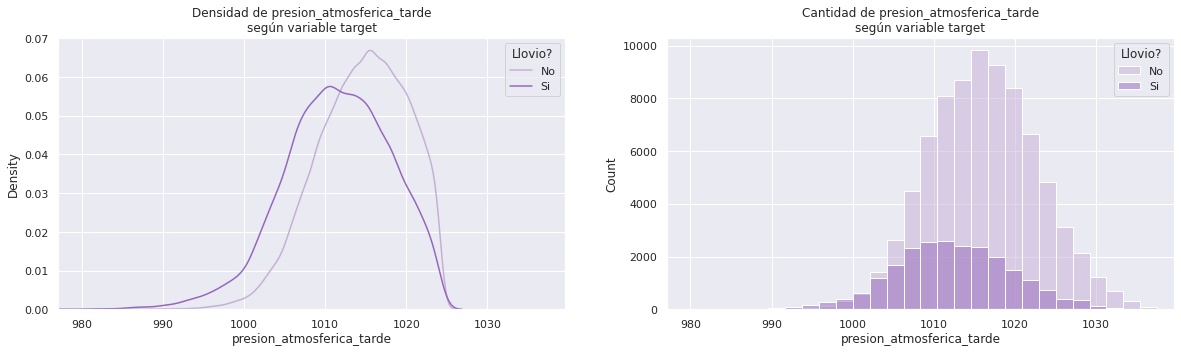

In [63]:
graficar_diferencia_target("presion_atmosferica_temprano", bins = 30)
graficar_diferencia_target("presion_atmosferica_tarde", bins = 30)

Para el caso de la presión, esta tiende a ser levemente menor cuando va a haber lluvia al día siguiente. Se puede apreciar levemente en los gráficos que para presiones menores a 1000 parecería ser superior la cantidad de veces que llovió que las que no. Podemos hacer un poco de zoom en los gráficos de la derecha:

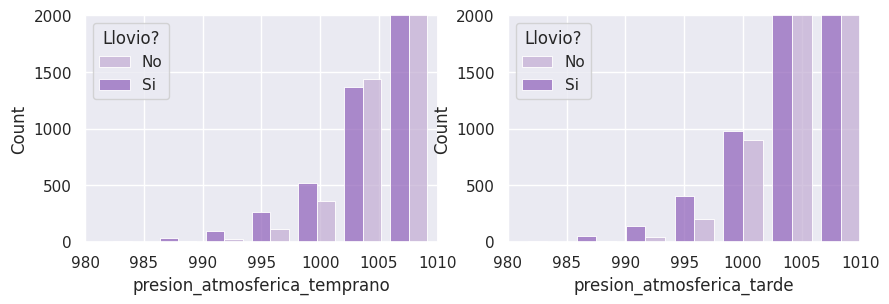

In [64]:
df_c = df.replace({variable_target: {1: "Sí", 0: "No"}})
fig, axs = plt.subplots(1, 2, dpi=100, figsize=(10,3))
graf_cant("presion_atmosferica_temprano", axs[0], df_c, bins = 15, separar = True)
graf_cant("presion_atmosferica_tarde", axs[1], df_c, bins = 15, separar = True)
axs[0].set_xlim((980, 1010))
axs[0].set_ylim((0,2000))
axs[1].set_xlim((980, 1010))
axs[1].set_ylim((0,2000))
plt.show()

En efecto, aproximadamente **para presiones menores a 1000 suele ser superior la cantidad de samples en las que llovió al día siguiente.** De todas formas no es un dato muy significante ya que la cantidad total de puntos que cumplen esto es bastante reducida.

### Ráfaga viento

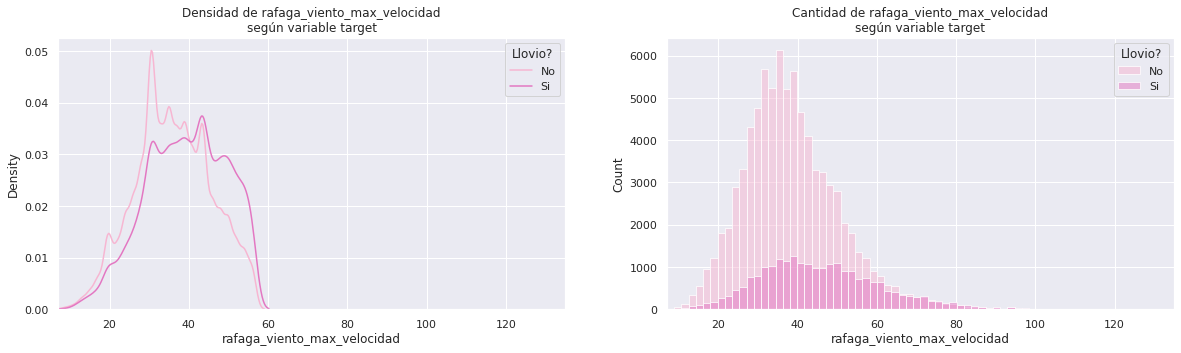

In [65]:
graficar_diferencia_target("rafaga_viento_max_velocidad", bins = 70)

A partir del gráfico de densidad podemos ver que los días positivos tienen una máxima velocidad más alta en promedio. Haciendo zoom en el de la derecha:

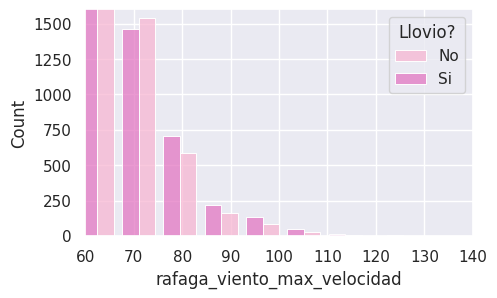

In [66]:
df_c = df.replace({variable_target: {1: "Sí", 0: "No"}})
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(5,3))
graf_cant("rafaga_viento_max_velocidad", ax, df_c, bins = 15, separar = True)
ax.set_xlim((60, 140))
ax.set_ylim((0, 1600))
plt.show()

Podemos ver que **para valores mayores a 80 hay más filas donde llovió al día siguiente que para aquellos que no**.

### Milimetros de lluvia

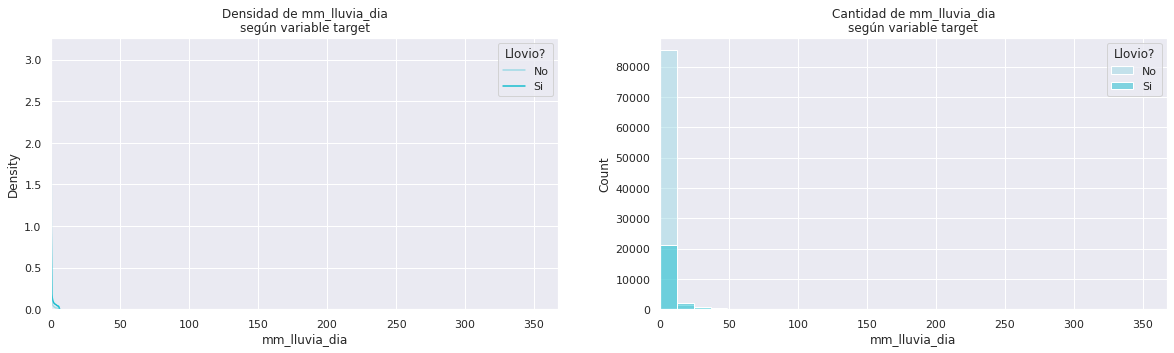

In [67]:
graficar_diferencia_target("mm_lluvia_dia", bins = 30)

Lamentablemente no se puede apreciar mucho en el gráfico ya que para la gran mayoría de los samples no llovió. Haciendo un poco de zoom en el de la derecha:

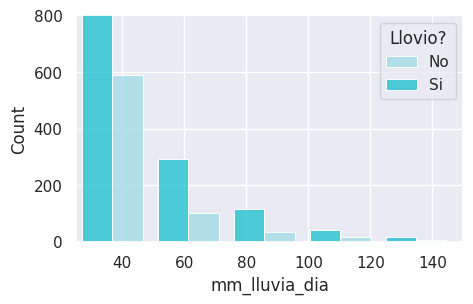

In [68]:
df_c = df.replace({variable_target: {1: "Sí", 0: "No"}})
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(5,3))
graf_cant("mm_lluvia_dia", ax, df_c, bins = 15, separar = True)
ax.set_xlim((25, 150))
ax.set_ylim((0, 800))
plt.show()

Podemos ver que a partir de alrededor de **30 milimetros de lluvia hay más samples en las que llueve hamburguesas al día siguiente que en las que no**.

## ¿Hay variables con relaciones que afecten al target?

Podemos también hacer algunos scatters plot de variables que parecen relacionadas para ver si notamos algun patrón cuando llueven hamurguesas.

In [69]:
def graficar_scatter(pareja, dataframe, puntos_extra = None):
    plt.figure(dpi=100)
    df_c = df.replace({variable_target: {1: "Sí", 0: "No"}})
    sns.scatterplot(
        x=pareja[0],
        y=pareja[1],
        hue='llovieron_hamburguesas_al_dia_siguiente',
        data=df_c,
        alpha=0.7,
        size=1,
        palette=get_par_colores(pareja[0]),
        hue_order=["Sí", "No"],
    ).legend(["No", "Si"]).set_title("Llovio?")

    plt.xlabel(pareja[0])
    plt.ylabel(pareja[1])
    
    if puntos_extra is not None:
        plt.plot(puntos_extra[0], puntos_extra[1], color = 'red')
    
    plt.show()

### Velocidad del viento

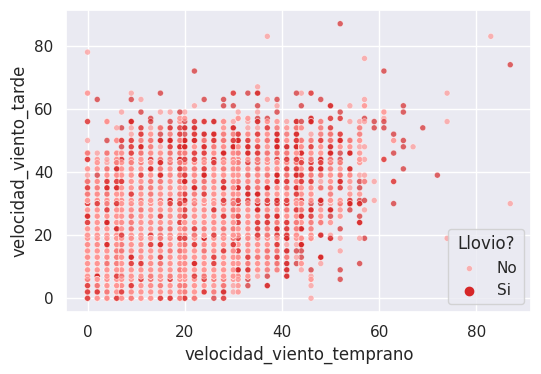

In [70]:
graficar_scatter(('velocidad_viento_temprano', 'velocidad_viento_tarde'), df)

A primera vista, no parece haber ninguna relación fácil de detectar con estos parámetros para predecir si va a llover hamburguesas al día siguiente.

### Humedad

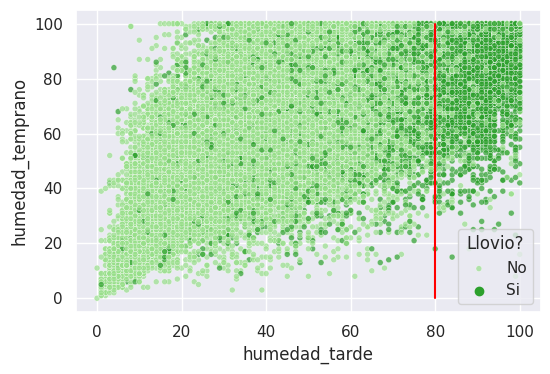

In [71]:
graficar_scatter(('humedad_tarde', 'humedad_temprano'), df, puntos_extra = ([80, 80], [0, 100]))

Este gráfico si parece tener una forma más interesante. A primera vista las variables parecen estár levemente relacionadas, pero se puede interpretar del gráfico que el hecho de que llueva hamburguesas al día siguiente depende más que nada de la humedad de la tarde y no tanto de la de la mañana. Esto coincide con lo que encontramos en la sección anterior: se puede notar que a partir de humedad de la tarde alrededor de 80 hay una concentración muchísimo mayor de puntos en los que al día siguiente llueve.

### Presión atmosférica

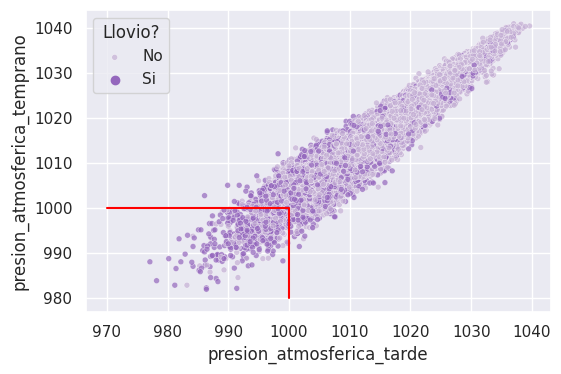

In [72]:
graficar_scatter(('presion_atmosferica_tarde', 'presion_atmosferica_temprano'), df, puntos_extra = ([970, 1000, 1000], [1000, 1000, 980]))

En este gráfico también se puede observar una alta correlación entre las presiones. Parecería que cuando ambas son bajas ($<1000$), se encuentra una concentración bastante grande de samples en las que al día siguiente llueven hamburguesas, similar a los resultados que encontramos antes.

### Temperaturas

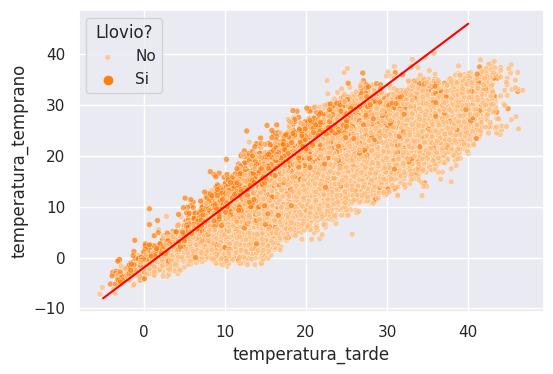

In [73]:
x = np.linspace(-5, 40, 3)
y = 1.2*x - 2

graficar_scatter(('temperatura_tarde', 'temperatura_temprano'), df, (x, y))

In [74]:
cant_no = len(df[(df.temperatura_temprano > 1.2*df.temperatura_tarde - 2) & (df[variable_target] == 0)])
cant_si = len(df[(df.temperatura_temprano > 1.2*df.temperatura_tarde - 2) & (df[variable_target] == 1)])

print(f"Cantidad de samples positivos por encima de la recta: {cant_si}")
print(f"Cantidad de samples negativos por encima de la recta: {cant_no}")
print(f"Relación: {cant_si/cant_no : .2f}")

Cantidad de samples positivos por encima de la recta: 2168
Cantidad de samples negativos por encima de la recta: 780
Relación:  2.78


Nuevamente tenemos dos variables muy relacionadas, y se puede ver claramente en el gráfico como **cuando la temperatura de la mañana está por encima de la recta, para la mayoría de los samples llueve hamburguesas al día siguiente**.
La recta es casi $y=x$, es decir que esto se da casi siempre que la temperatura de la mañana es mayor a la de la tarde.

### Temperaturas extremas

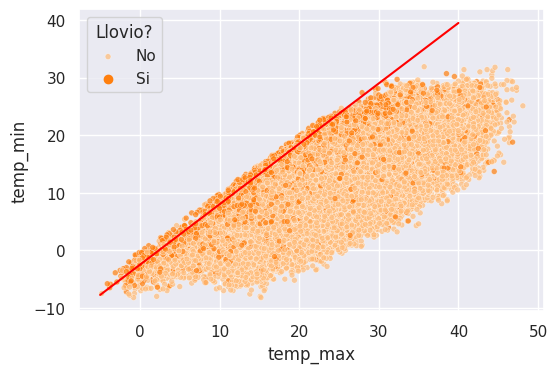

In [75]:
x = np.linspace(-5, 40, 3)
y = 1.05*x - 2.5
graficar_scatter(('temp_max', 'temp_min'), df, (x, y))

In [76]:
cant_no = len(df[(df.temp_min > 1.05*df.temp_max - 2.5) & (df[variable_target] == 0)])
cant_si = len(df[(df.temp_min > 1.05*df.temp_max - 2.5) & (df[variable_target] == 1)])

print(f"Cantidad de samples positivos por encima de la recta: {cant_si}")
print(f"Cantidad de samples negativos por encima de la recta: {cant_no}")
print(f"Relacion: {cant_si/cant_no : .2f}")

Cantidad de samples positivos por encima de la recta: 515
Cantidad de samples negativos por encima de la recta: 103
Relacion:  5.00


Para las temperaturas máximas y mínimas, tenemos una relación similar a la anterior: **cuando la temperatura mínima se encuentra por encima de esa recta, hay más samples que llueven al día siguiente que los que no.** 

En este caso, esto es cuando la temperatura máxima y mínima del día son muy próximas.

## ¿Cómo varían las features categóricas cuando llueve al día siguiente?

### Barrio

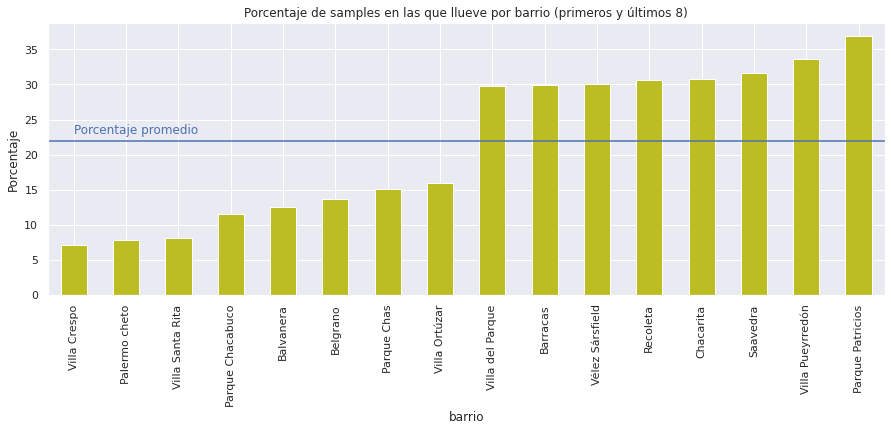

In [77]:
perc = (df.groupby("barrio").agg("mean")[variable_target]*100).to_frame().sort_values(by=variable_target)

perc = perc.head(8).append(perc.tail(8))

ax = perc.plot(kind="bar", color = get_par_colores("barrio")[0], legend = "")
ax.set_ylabel("Porcentaje")
ax.set_title("Porcentaje de samples en las que llueve por barrio (primeros y últimos 8)")
plt.gcf().set_size_inches(15, 5)
plt.axhline(22) # El que calculamos antes en el gráfico torta
plt.text(0, 23, "Porcentaje promedio", color = 'C0')
plt.show()

Podemos ver en el gráfico que los 5 barrios con lluvia más frecuente no nos ofrecen mucha información ya que siguen siendo menor a 50% por bastante, por lo que el target no sucede con mucha más frecuencia.
De todas formas, si podemos tomar por la negativa y mirar los menos frecuentes. **Solo el ~7% de las mediciones en Villa Crespo llueven hamburguesas al día siguiente**, con lo cual podemos descartar que llueva si es en ese barrio.

# Baseline

In [78]:
def llueve(row, resultado):
    ret = 0
    if row['horas_de_sol'] <= 1:
        ret = 1
    if row['humedad_tarde'] >= 80:
        ret = 1
    # Descartamos este resultado ya que bajaba el accuracy, probablemente se deba a que
    # ya capturamos la mayoría de los positivos de ese resultado con otras condiciones,
    # y la diferencia de casos positivos y negativos con esa condición no era tan significante
    
    #if row['nubosidad_tarde'] == 8:
    #    ret = 1
    if row['presion_atmosferica_temprano'] <= 1000:
        ret = 1

    # Esta era la columna con números inválidos, esta función los transforma en NaN
    if pd.to_numeric(row['presion_atmosferica_tarde'], errors='coerce') <= 1000:
        ret = 1

    if row['rafaga_viento_max_velocidad'] >= 80:
        ret = 1
    if 1.2*row['temperatura_tarde'] - 2 < row['temperatura_temprano']:
        ret = 1
    if 1.05*row['temp_max'] - 2.5 < row['temp_min']:
        ret = 1
    if row['mm_lluvia_dia'] >= 30:
        ret = 1
 
    if row['barrio'] == "Villa Crespo":
        ret = 0
    if row['horas_de_sol'] >= 8:
        ret = 0
    if row['nubosidad_tarde'] == 0:
        ret = 0
    if row['humedad_tarde'] < 60:
        ret = 0
 
    resultado.append(ret)

def baseline(dataframe):
    dataframe = dataframe.replace({variable_target : {"si" : 1, "no" : 0}})
    resultado = []
    dataframe.apply(lambda row: llueve(row, resultado), axis=1)
    return resultado

df_con_target = df_original[~df_original[variable_target].isna()]
resultado_baseline = baseline(df_con_target)
correctos = 0
falsos_positivos = 0
for i, x in enumerate(df_con_target[variable_target].tolist()):
    if (x == 'si' and resultado_baseline[i] == 1) or (x == 'no' and resultado_baseline[i] == 0):
        correctos += 1
    if x == 'no' and resultado_baseline[i] == 1:
        falsos_positivos += 1

print(f"Porcentaje correctos: {correctos/len(resultado_baseline)*100 : .2f}%")
print(f"Porcentaje de falsos positivos entre los incorrectos: {100*falsos_positivos/(len(resultado_baseline)-correctos) : .2f}%")
print(f"Cantidad de falsos positivos: {falsos_positivos}")
cant_pos = len(df_con_target[df_con_target[variable_target] == 'si'])
print(f"Porcentaje de positivos detectados: {100*(resultado_baseline.count(1) - falsos_positivos)/cant_pos :.2f}%")

Porcentaje correctos:  82.74%
Porcentaje de falsos positivos entre los incorrectos:  20.61%
Cantidad de falsos positivos: 4045
Porcentaje de positivos detectados: 38.78%
